
## Team Members:
1. Denise Lie
2. Durga DO Chandrasekaran
3. Gilchris Nathaniel
4. Ng Zhen Cong Matthew
5. Ing Reiwen

#### Dataset: 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing.csv')

df.head()

,ID,Crime_Rate,Residential_Area,Non_Retail,River,Pollutants,Rooms,Old_Housing,Distance_Office,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price
0,1,Low,Very Low,2.31,Far,0.538,6.575,65.2,4.0900,Low,296,15.3,4.98,24.0
1,2,Low,Very Low,7.07,Far,0.469,6.421,78.9,4.9671,Low,242,17.8,9.14,21.6
2,3,Low,Very Low,7.07,Far,0.469,7.185,61.1,4.9671,Low,242,17.8,4.03,34.7
3,4,Low,Very Low,2.18,Far,0.458,6.998,45.8,6.0622,Low,222,18.7,2.94,33.4
4,5,Low,Very Low,2.18,Far,0.458,7.147,54.2,6.0622,Low,222,18.7,5.33,36.2


## Part I: Exploratory Data Analysis (EDA)

### 1. Overview of dataset

**a.** Summarise the background of the dataset [limited to 50 words]

**Response.**

The dataset "Housing.csv" contains data from a census survey with regards to housing in a region. Each row corresponds to a town, hence the values of each attribute is for each town. All columns (excluding ID and Price) have varying impacts on the price of housing in each town.

**b.** State the size of the dataset

**Response.**

The data contains 506 rows and 14 columns.

In [2]:
n_rows, n_cols = df.shape

print(f"# of rows is {n_rows}")
print(f"# of columns is {n_cols}")

# of rows is 506
# of columns is 14


**c.** For each variable, describe what it represents and its data type (numerical or categorical)

**Response.**

Variables that have object datatype are identified as categorical features, while variables that have non-object datatype are identified as numerical features. Although the datatype of values in column ID are integers, ID is an identifier column with one unique value per category, it is identified as a categorical feature as well.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     506 non-null    int64  
 1   Crime_Rate             506 non-null    object 
 2   Residential_Area       478 non-null    object 
 3   Non_Retail             506 non-null    float64
 4   River                  506 non-null    object 
 5   Pollutants             506 non-null    float64
 6   Rooms                  476 non-null    float64
 7   Old_Housing            506 non-null    float64
 8   Distance_Office        506 non-null    float64
 9   Highway_Access         506 non-null    object 
 10  Tax_Rate               506 non-null    int64  
 11  Student_Teacher_Ratio  506 non-null    float64
 12  Low_Income             506 non-null    float64
 13  Price                  506 non-null    float64
dtypes: float64(8), int64(2), object(4)
memory usage: 55.5+ KB


|Column Name|Description|Data Type|Details|
|---|---|---|---|
|ID|Identification Number|Categorical|
|Crime_Rate|Crime Rate per capita|Categorical|"High", "Moderate", "Low"|
|Residential_Area|Proportion of Residential Area|Categorical|"Very High", "High", "Moderate", "Low", "Very Low"|
|Non_Retail|Percentage of business areas used for non-retail|Numerical|
|River|Near Bridge|Categorical|"Near","Far"|
|Pollutants|Concentration of pollutants (parts per 10 million)|Numerical|
|Rooms|Number of rooms per unit|Numerical|
|Old_Housing|Percentage of units built before second world war|Numerical|
|Distance_Office|Weighted distances to major office areas|Numerical|
|Highway_Access|Accessibility to major highways|Categorical|"High", "Moderate", "Low"|
|Tax_Rate|Property tax rate per \$10,000|Numerical|
|Student_Teacher_Ratio|Student to teacher ratio|Numerical|
|Low_Income|Percentage of low income households|Numerical|
|Price|Median price of homes (in $1000s)|Numerical|

### 2. Data pre-processing

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

**Response.** 

 To analyse the percentage of missing data, we explored the number of data entries for each column by employing the `df.count()` function. From the output below, we can see that the columns `Residential_Area` and `Rooms` have with missing data. 

In [4]:
df.count()

ID                       506
Crime_Rate               506
Residential_Area         478
Non_Retail               506
River                    506
Pollutants               506
Rooms                    476
Old_Housing              506
Distance_Office          506
Highway_Access           506
Tax_Rate                 506
Student_Teacher_Ratio    506
Low_Income               506
Price                    506
dtype: int64

To calculate the <b>percentage</b> of missing data, we will take the count of the non-null entries per column divided by the total number of entries, and subsequently, multiply by a 100 to get the percentage. We have formatted the percentages to 2 decimal places.

In [5]:
n_rows, n_cols = df.shape

# find the percentage
percentage = df.count() / n_rows * 100 

# add percent sign
percentage.apply(lambda x:"{:.2f}%".format(x))


ID                       100.00%
Crime_Rate               100.00%
Residential_Area          94.47%
Non_Retail               100.00%
River                    100.00%
Pollutants               100.00%
Rooms                     94.07%
Old_Housing              100.00%
Distance_Office          100.00%
Highway_Access           100.00%
Tax_Rate                 100.00%
Student_Teacher_Ratio    100.00%
Low_Income               100.00%
Price                    100.00%
dtype: object

We can see that `Residential_Area` has about 5.53% of missing data and `Rooms` has about 5.93% of missing data. To help us decide on whether to impute or drop these records, we employed a <b>bar chart</b> for `Residential_Area` (categorical data) and a <b>histogram</b> for `Rooms` (numerical data).

**1. Residential_Area**

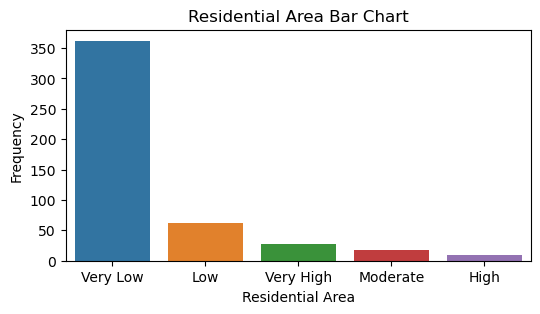

In [6]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Residential_Area', data=df, order = df['Residential_Area'].value_counts().index)
plt.title('Residential Area Bar Chart')
plt.xlabel('Residential Area')
plt.ylabel('Frequency')
plt.show()

We can observe from the bar chart above that the category `Very Low` represents a significant amount of the data relative to the other categories. This implies that it is more likely for the missing datas to be from the `Very Low` category. 

While deleting these data points may be a viable solution, we have decided against dropping them as the outliers form around 5% of our dataset, which translates to more than 50 data points. This could potentially affect our analysis of the dataset as final datas may not reflect a genuine variation within the population. Hence, we have decided to <b>impute</b> the data with value `Very Low`.

In [7]:
mode = df['Residential_Area'].mode()[0]

df['Residential_Area'].fillna(mode, inplace=True)

**2. Rooms**

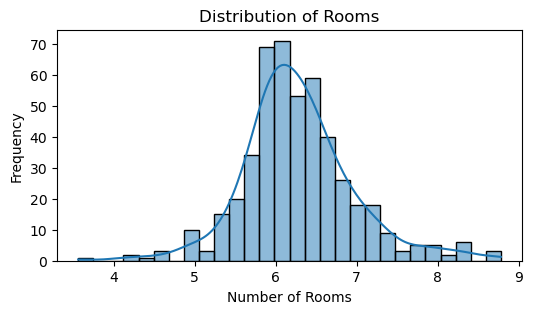

In [8]:
plt.figure(figsize=(6, 3))
sns.histplot(df['Rooms'].dropna(), kde=True)
plt.title('Distribution of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.show()

The observed distribution of the data exhibits a near-normal distribution, indicating a nearly symmetrical spread of values. Hence, we decided that employing <b>mean imputation</b> is a viable method for handling missing values.

In [9]:
mean = df['Rooms'].mean()

df['Rooms'].fillna(mean, inplace=True)

Another reason for avoiding the removal of rows is because eliminating data for both categories, `Residential_Area` and `Rooms`, would result in a loss of 11.26% of our dataset. This substantial loss could weaken the overall data quality, thereby hindering our ability to derive reliable insights.

**ID Column**

Now we have addressed the columns with the missing values. Although there are no more values with NaN values, we realized that the `ID` column is not beneficial because we do not need to isolate an individual ID in our exploratory analysis and visualisation. It is an identifier column that does not contribute towards the predictive power of the model. Hence, we decided to drop the entire ID column

In [10]:
#dropping 'ID' column
df = df.drop(columns = ['ID'])

Here is the updated data set. We have 506 rows and 13 columns.

In [11]:
df.count()

Crime_Rate               506
Residential_Area         506
Non_Retail               506
River                    506
Pollutants               506
Rooms                    506
Old_Housing              506
Distance_Office          506
Highway_Access           506
Tax_Rate                 506
Student_Teacher_Ratio    506
Low_Income               506
Price                    506
dtype: int64

In [12]:
n_rows, n_cols = df.shape

print(f"# of rows is {n_rows}")
print(f"# of columns is {n_cols}")

# of rows is 506
# of columns is 13


**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

For <b>categorical data</b>, we will not be looking for outliers due to the nature of categorical data. Unlike numerical data, categorical variables do not have inherent ordering or magnitude. Therefore, there is no meaningful way to measure the extreme values as outliers.


For <b>numerical data</b>, we will plot boxplots to identify the outliers. Values that are above the top line and below the bottom line are outliers, which are visualised as circles. After analysing all the boxplots, we have organised them into two sections, `Section 1` for attributes with outliers and `Section 2` for attributes with no outliers. 

<b> Section 1 : Attributes with  outliers </b>

To identify outliers, our approach involves initially plotting histograms to assess the distribution. If the distribution appears skewed, we opt for the Interquartile Range Method (IQR) along with boxplots, as it is more robust to extreme values. On the other hand, if the distribution appears approximately normal, we will use Z-score which assumes that the data is normally distributed. 

For IQR, outliers are defined as datas that are under (first quartile - 1.5 * interquartile range) or above (third quartile + 1.5 * interquartile range). note: interquartile range = third quartile - first quartile

For Z-Score, normally outliers are datas that have a Z-score of more than 3 or less than -3. We can calculate Z by this formula Z = (X - mean) / standard deviation. note: X is the our data. 

We have plotted the histogram for each numerical variable in 3.b. We can see that `Rooms` is the only variable that is almost normally distributed. Hence, we will use Z-score to identify the outliers for `Rooms`, and IQR method for the rest.


**1. Low Income Families**

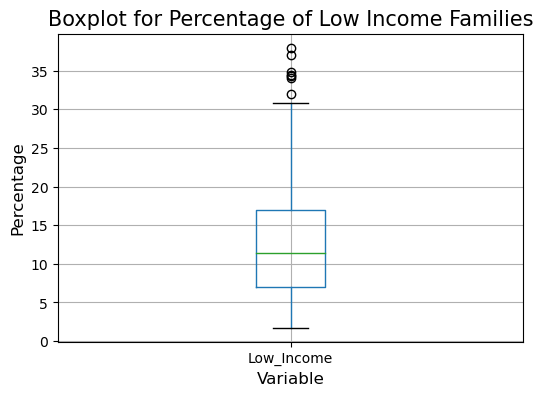

In [13]:
plt.figure(figsize = (6,4))
df[["Low_Income"]].boxplot() #important line
plt.title("Boxplot for Percentage of Low Income Families", fontsize = 15)
plt.xlabel("Variable", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.show()

In [14]:
Q1 = df['Low_Income'].quantile(0.25) #calculate first quartile
Q3 = df['Low_Income'].quantile(0.75) #calculate third quartile
IQR = Q3 - Q1 #calculate interquartile range
outliers = df[(df['Low_Income'] > (Q3 + 1.5 * IQR)) | (df['Low_Income'] < (Q1 - 1.5 * IQR))] #find values that are either above 
                                                                                             #Q3 + 1.5 * IQR or 
                                                                                             #below Q1 - 1.5 * IQR
percentage = outliers.shape[0]/df.shape[0]*100 #count percentage of outliers
    
print(f"Percentage of outliers for Percentage of Low Income families based on IQR method: {percentage:.2f}%")

Percentage of outliers for Percentage of Low Income families based on IQR method: 1.38%


As we can see from the box plot, the data represented by circles that fall outside the 'whiskers' of the box plot should be considered as outliers. The outliers are far from the mean which can indicate variability or errors in the data collection process. As a result, this could significant skew the mean and variance, affecting our data quality for our subsequent analysis. Therefore, we decided to drop these data points.

**2. Distance from Office**

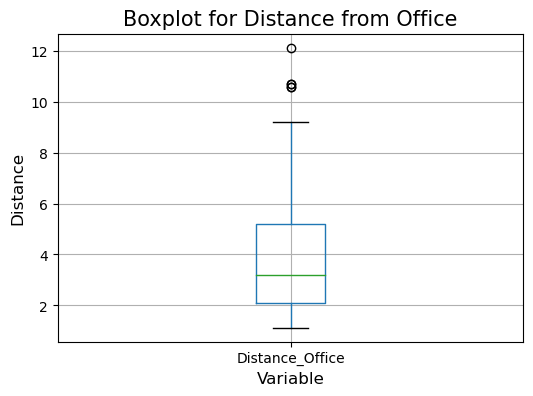

In [15]:
plt.figure(figsize = (6,4))
df[["Distance_Office"]].boxplot() #important line
plt.title("Boxplot for Distance from Office", fontsize = 15)
plt.xlabel("Variable", fontsize = 12)
plt.ylabel("Distance", fontsize = 12)
plt.show()

In [16]:
Q1 = df['Distance_Office'].quantile(0.25)
Q3 = df['Distance_Office'].quantile(0.75)
IQR = Q3 - Q1 
outliers = df[(df['Distance_Office'] > (Q3 + 1.5 * IQR)) | (df['Distance_Office'] < (Q1 - 1.5 * IQR))]
percentage = outliers.shape[0]/df.shape[0]*100
    
print(f"Percentage of outliers for Distance from Office based on IQR method: {percentage:.2f}%")

Percentage of outliers for Distance from Office based on IQR method: 0.99%


Similarly, from the boxplot for `Distance From Office`, there are some data points, represented by circles, which are significantly higher than the majority of the data. One of the reasons that could have caused this discrepancy is the method utilised to calculate the weighted distances, which could introduce outliers. 

Furthermore, these outliers can affect our mean and potentially skew it higher. With this reasoning in mind, we decided to drop the outlier data points.

**3. Rooms**

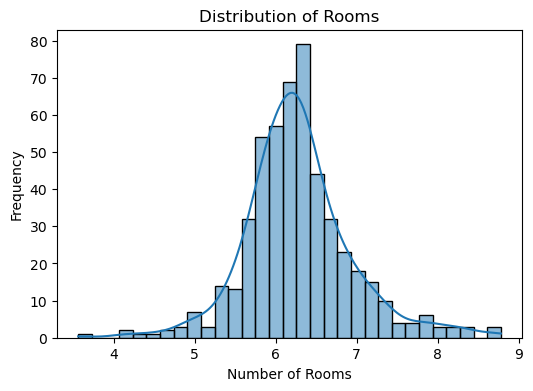

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Rooms'].dropna(), kde=True)
plt.title('Distribution of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.show()

In [18]:
mean = df['Rooms'].mean() #calculating the mean
stdev = df['Rooms'].std() #calculating the standard deviation
Z =  (df['Rooms'] - mean) / stdev #converting each value of each data into Z-scores
outliers = df[(Z > 3) | (Z < -3)] #finding datas with Z-scores larger than 3 or less than -3
percentage = outliers.shape[0]/df.shape[0]*100 #counting the percentage of outliers
    
print(f"Percentage of outliers for Rooms based on Z-score method: {percentage:.2f}%")

Percentage of outliers for Rooms based on Z-score method: 1.78%


According to the code, the percentage of outliers is 1.78%. This means that 1.78% of the data points fall outside the range (Z-scores greater than 3 or less than -3) and may be considered as outliers.  
 
The outliers, in this context, could represent extreme and unusual housing units that can distort the measures of central tendency like the mean and standard deviation significantly. 
 
Hence, it is necessary to further analyse and consider why these outliers exist. It could be due to other factors that causes certain units to deviate from the norm. We have insufficient information to examine the validity of these outliers individually and determine if they should be included in our dataset. Moreover, since 1.78% is a relatively small percentage as compared to our entire dataset, we decided to drop the outlier.

**4. Student Teacher Ratio**

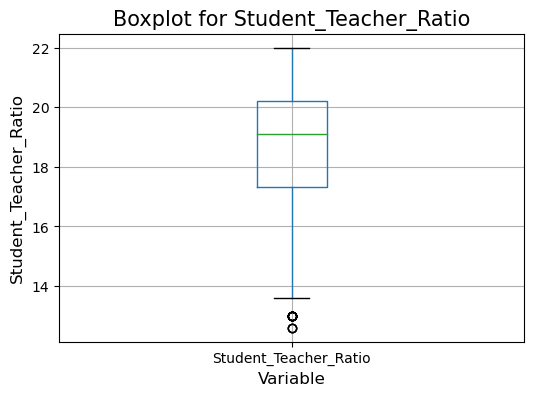

In [19]:
plt.figure(figsize = (6,4))
df[["Student_Teacher_Ratio"]].boxplot() #important line
plt.title("Boxplot for Student_Teacher_Ratio", fontsize = 15)
plt.xlabel("Variable", fontsize = 12)
plt.ylabel("Student_Teacher_Ratio", fontsize = 12)
plt.show()

In [20]:
Q1 = df['Student_Teacher_Ratio'].quantile(0.25)
Q3 = df['Student_Teacher_Ratio'].quantile(0.75)
IQR = Q3 - Q1 
outliers = df[(df['Student_Teacher_Ratio'] > (Q3 + 1.5 * IQR)) | (df['Student_Teacher_Ratio'] < (Q1 - 1.5 * IQR))]
percentage = outliers.shape[0]/df.shape[0]*100
    
print(f"Percentage of outliers for Student Teacher Ratio based on IQR method: {percentage:.2f}%")

Percentage of outliers for Student Teacher Ratio based on IQR method: 2.96%


The boxplot shows that there are some datapoints lower than the majority of the data. 

The outliers form 3% of our data, which is a significant number of records. Furthermore, contextually, it is possible that some towns have lower student teacher ratio due to a greater number of private schools or school that employ teaching methods like Waldorf or Montessori. Hence, we have decided against dropping the outliers.

**5. Price**

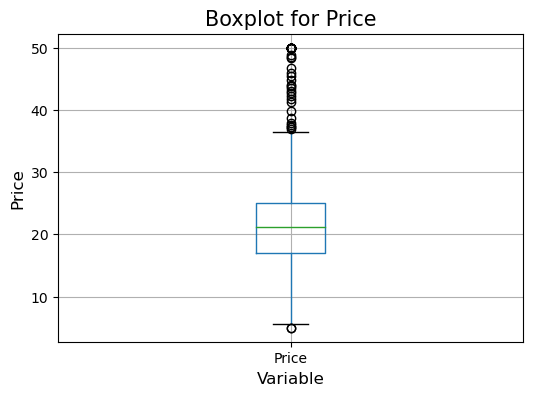

In [21]:
plt.figure(figsize = (6,4))
df[["Price"]].boxplot() #important line
plt.title("Boxplot for Price", fontsize = 15)
plt.xlabel("Variable", fontsize = 12)
plt.ylabel("Price", fontsize = 12)
plt.show()

In [22]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1 
outliers = df[(df['Price'] > (Q3 + 1.5 * IQR)) | (df['Price'] < (Q1 - 1.5 * IQR))]
percentage = outliers.shape[0]/df.shape[0]*100
    
print(f"Percentage of outliers for Price based on IQR method: {percentage:.2f}%")

Percentage of outliers for Price based on IQR method: 7.91%


Price has datapoints that are higher than the majority of the data, but they should not be removed as  they might contain key information about how combination of the independent variables contribute to these outlier, and they constitute 7.91% of the data, which is a significant portion. Furthermore, it makes sense that places with more complex environments can have prices outisde the norm. Hence, we will be leaving those in.

**Dropping Outliers**

From the analysis above, we found out that `Low_Income`, `Distance_Office` and `Rooms` attributes have outliers and hence we decided to drop them. 

In [23]:
# Columns that have outliers
toDrop = ['Low_Income', 'Distance_Office']

# Drop outliers for each column
for variable in toDrop:
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1

    df = df.drop(df[(df[variable] < Q1 - 1.5 * IQR) | (df[variable] > Q3 + 1.5 * IQR)].index)

# Drop for `Rooms` outliers
mean = df['Rooms'].mean()
stdev = df['Rooms'].std()
Z =  (df['Rooms'] - mean) / stdev 
df = df.drop(df[((df['Rooms'] - mean) / stdev > 3) | ((df['Rooms'] - mean) / stdev < -3)].index)

Let's see the updated data.

In [24]:
df.count()

Crime_Rate               484
Residential_Area         484
Non_Retail               484
River                    484
Pollutants               484
Rooms                    484
Old_Housing              484
Distance_Office          484
Highway_Access           484
Tax_Rate                 484
Student_Teacher_Ratio    484
Low_Income               484
Price                    484
dtype: int64

From here, we can see that we deleted `4.35% (22 rows)` of the dataset.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime_Rate             484 non-null    object 
 1   Residential_Area       484 non-null    object 
 2   Non_Retail             484 non-null    float64
 3   River                  484 non-null    object 
 4   Pollutants             484 non-null    float64
 5   Rooms                  484 non-null    float64
 6   Old_Housing            484 non-null    float64
 7   Distance_Office        484 non-null    float64
 8   Highway_Access         484 non-null    object 
 9   Tax_Rate               484 non-null    int64  
 10  Student_Teacher_Ratio  484 non-null    float64
 11  Low_Income             484 non-null    float64
 12  Price                  484 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 52.9+ KB


In [26]:
percentage = 484 / 506 * 100
print("Remaining data after dropping outliers: {:.2f}%".format(percentage))

Remaining data after dropping outliers: 95.65%


<b> Section 2 : Attributes with no outliers </b>

These are the remaining attributes that don't have any outliers according to their boxplots.

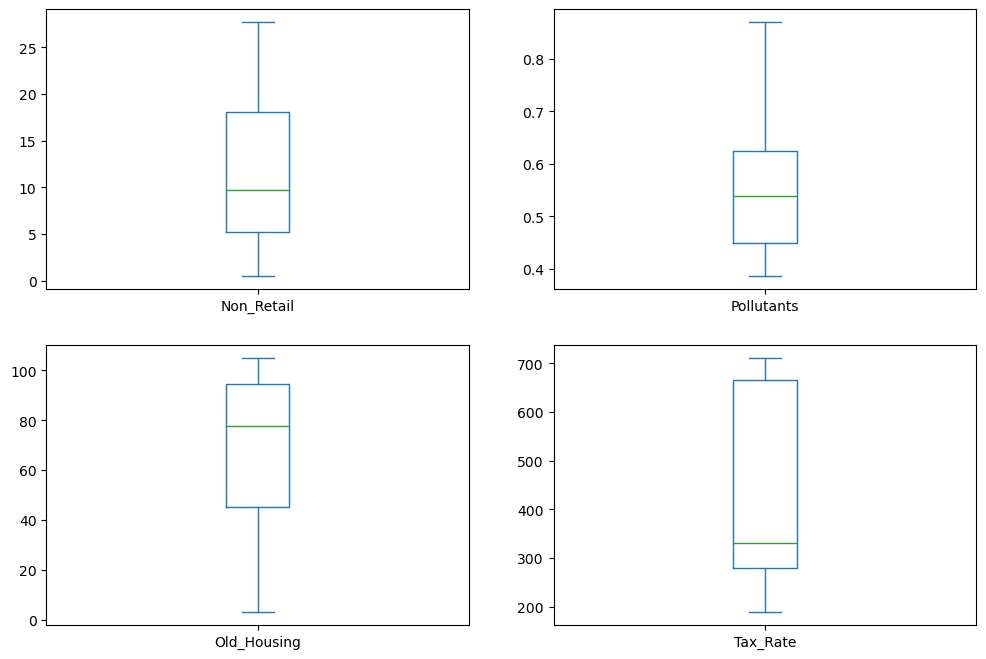

In [27]:
#multiple boxplots together
df_numerics = df[["Non_Retail", "Pollutants", "Old_Housing", "Tax_Rate"]]
df_numerics.plot(kind = 'box', subplots=True, layout = (2, 2), figsize = (12, 8))
plt.show()

While it seems that outliers are not present based on initial inspection of the boxplots, to ensure the accuracy of our assessment, we have chosen to employ the summary statistics table for additional verification of our findings.

In [28]:
# summary statistics for numerical variables

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Non_Retail,484.0,11.139360,6.822460,0.4600,5.1900,9.6900,18.100000,27.7400
Pollutants,484.0,0.553553,0.115707,0.3850,0.4490,0.5380,0.624000,0.8710
Rooms,484.0,6.273855,0.572850,4.3680,5.9110,6.2470,6.553000,8.2470
Old_Housing,484.0,68.983264,28.192043,2.9000,45.3250,77.5000,94.500000,105.0000
Distance_Office,484.0,3.775512,1.978360,1.1296,2.1169,3.2759,5.141475,9.2229
Tax_Rate,484.0,405.621901,167.759859,188.0000,279.0000,330.0000,666.000000,711.0000
Student_Teacher_Ratio,484.0,18.449380,2.135721,12.6000,17.2500,19.0000,20.200000,21.2000
Low_Income,484.0,12.513822,6.655901,1.7300,7.1975,11.4650,16.780000,30.8100
Price,484.0,22.333884,8.744930,5.0000,17.1000,21.2000,25.000000,50.0000


From this table, we can see that the max value for percentage of old housing is 105%, which exceeds 100% and is not practical in real life. In the table below, we have selected the rows with values of percentage of `old_housing` between 100% and 105%.

In [29]:
df[df['Old_Housing'] > 100]

,Crime_Rate,Residential_Area,Non_Retail,River,Pollutants,Rooms,Old_Housing,Distance_Office,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price
23,Low,Very Low,8.14,Far,0.538,5.813000,105.0,4.0952,Moderate,307,21.0,19.88,14.5
81,Low,Low,4.86,Far,0.426,6.619000,102.0,5.4007,Moderate,281,19.0,7.22,23.9
115,Low,Very Low,10.01,Far,0.547,6.278624,102.0,2.4631,Moderate,432,17.8,15.76,18.3
147,Low,Very Low,19.58,Far,0.871,4.926000,102.0,1.4608,Moderate,403,14.7,29.53,14.6
211,Low,Very Low,10.59,Near,0.489,5.404000,102.0,3.6650,Moderate,277,19.2,23.98,19.3
303,Low,Low,6.09,Far,0.433,6.982000,102.0,5.6263,Moderate,329,16.1,4.86,33.1
363,Moderate,Very Low,18.10,Near,0.770,5.803000,102.0,1.9047,High,666,20.2,14.64,16.8
370,Moderate,Very Low,18.10,Near,0.631,7.016000,102.0,1.2024,High,666,20.2,2.96,50.0
391,Moderate,Very Low,18.10,Far,0.700,6.051000,102.0,2.1678,High,666,20.2,18.76,23.2
402,Moderate,Very Low,18.10,Far,0.693,6.404000,102.0,1.6390,High,666,20.2,20.31,12.1


From the table above, we can see that there are 11 rows which have values that over 100% for `Old_Housing`. 
 
We have chosen to drop these entries. Our reason for doing so is because it is not possible for old_housing (percentage of units built before second world war) to go beyond 100% in the first place. Hence, this might suggests errors within the data collection or recording processes. Hence, this mistake results in no viable way to impute new values for these rows and we have concluded that dropping these data will be a better option to ensure greater accuracy in our data analysis

In [30]:
df = df[df['Old_Housing'] <= 100]

Here we can see that the we dropped the 11 rows and are left with 471 data points. 

In [31]:
df.count()

Crime_Rate               471
Residential_Area         471
Non_Retail               471
River                    471
Pollutants               471
Rooms                    471
Old_Housing              471
Distance_Office          471
Highway_Access           471
Tax_Rate                 471
Student_Teacher_Ratio    471
Low_Income               471
Price                    471
dtype: int64

**c.** For categorical variables, perform the necessary encoding.

All the categorical data have an order relation.

For `River` category, there are 2 categories and hence we decided to use binary encoding for it. 

For the other categories, which have more than two options, we use ordinal encoding, meaning we assign numbers to represent their order. We will use 0 for "low", 1 for "moderate", and 2 for "high". However, for `Residential Area`, we have more options, so we use numbers from 0 for very low to 4 for very high.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Crime_Rate             471 non-null    object 
 1   Residential_Area       471 non-null    object 
 2   Non_Retail             471 non-null    float64
 3   River                  471 non-null    object 
 4   Pollutants             471 non-null    float64
 5   Rooms                  471 non-null    float64
 6   Old_Housing            471 non-null    float64
 7   Distance_Office        471 non-null    float64
 8   Highway_Access         471 non-null    object 
 9   Tax_Rate               471 non-null    int64  
 10  Student_Teacher_Ratio  471 non-null    float64
 11  Low_Income             471 non-null    float64
 12  Price                  471 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 51.5+ KB


In [33]:
#create a copy here
df_encoded = df.copy()
df_encoded.head()

,Crime_Rate,Residential_Area,Non_Retail,River,Pollutants,Rooms,Old_Housing,Distance_Office,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price
0,Low,Very Low,2.31,Far,0.538,6.575,65.2,4.0900,Low,296,15.3,4.98,24.0
1,Low,Very Low,7.07,Far,0.469,6.421,78.9,4.9671,Low,242,17.8,9.14,21.6
2,Low,Very Low,7.07,Far,0.469,7.185,61.1,4.9671,Low,242,17.8,4.03,34.7
3,Low,Very Low,2.18,Far,0.458,6.998,45.8,6.0622,Low,222,18.7,2.94,33.4
4,Low,Very Low,2.18,Far,0.458,7.147,54.2,6.0622,Low,222,18.7,5.33,36.2


In [34]:
from sklearn.preprocessing import OrdinalEncoder

#binary encoding for River
encoding = {"Near":0, "Far":1}
df_encoded["River_enc"] = df["River"].map(encoding)
#df["River_enc"] = df["River"].map(encoding)

#ordinal encoding for the rest
enc = OrdinalEncoder()
columns_to_encode = ["Crime_Rate", "Residential_Area", "Highway_Access"]

encoded_columns = enc.fit_transform(df[columns_to_encode])

encoded_df = pd.DataFrame(encoded_columns, columns=[f"{col}_encoded" for col in columns_to_encode])

df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df, encoded_df], axis=1)

# Print it out
df_encoded

,Crime_Rate,Residential_Area,Non_Retail,River,Pollutants,Rooms,Old_Housing,Distance_Office,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price,Crime_Rate_encoded,Residential_Area_encoded,Highway_Access_encoded
0,Low,Very Low,2.31,Far,0.538,6.575,65.2,4.0900,Low,296,15.3,4.98,24.0,1.0,4.0,1.0
1,Low,Very Low,7.07,Far,0.469,6.421,78.9,4.9671,Low,242,17.8,9.14,21.6,1.0,4.0,1.0
2,Low,Very Low,7.07,Far,0.469,7.185,61.1,4.9671,Low,242,17.8,4.03,34.7,1.0,4.0,1.0
3,Low,Very Low,2.18,Far,0.458,6.998,45.8,6.0622,Low,222,18.7,2.94,33.4,1.0,4.0,1.0
4,Low,Very Low,2.18,Far,0.458,7.147,54.2,6.0622,Low,222,18.7,5.33,36.2,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Low,Very Low,11.93,Far,0.573,6.593,69.1,2.4786,Low,273,21.0,9.67,22.4,1.0,4.0,1.0
467,Low,Very Low,11.93,Far,0.573,6.120,76.7,2.2875,Low,273,21.0,9.08,20.6,1.0,4.0,1.0
468,Low,Very Low,11.93,Far,0.573,6.976,91.0,2.1675,Low,273,21.0,5.64,23.9,1.0,4.0,1.0
469,Low,Very Low,11.93,Far,0.573,6.794,89.3,2.3889,Low,273,21.0,6.48,22.0,1.0,4.0,1.0


In [35]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Crime_Rate                471 non-null    object 
 1   Residential_Area          471 non-null    object 
 2   Non_Retail                471 non-null    float64
 3   River                     471 non-null    object 
 4   Pollutants                471 non-null    float64
 5   Rooms                     471 non-null    float64
 6   Old_Housing               471 non-null    float64
 7   Distance_Office           471 non-null    float64
 8   Highway_Access            471 non-null    object 
 9   Tax_Rate                  471 non-null    int64  
 10  Student_Teacher_Ratio     471 non-null    float64
 11  Low_Income                471 non-null    float64
 12  Price                     471 non-null    float64
 13  Crime_Rate_encoded        471 non-null    float64
 14  Residentia

### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

**Numerical variables**

In [36]:
# summary statistics for numerical variables

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Non_Retail,471.0,11.031507,6.804753,0.4600,5.1900,8.5600,18.10000,27.7400
Pollutants,471.0,0.552231,0.115147,0.3850,0.4490,0.5320,0.62400,0.8710
Rooms,471.0,6.278792,0.572123,4.3680,5.9200,6.2500,6.55400,8.2470
Old_Housing,471.0,68.065605,28.023892,2.9000,44.0500,76.5000,93.80000,100.0000
Distance_Office,471.0,3.799590,1.986628,1.1296,2.1223,3.3175,5.21325,9.2229
Tax_Rate,471.0,402.515924,166.569222,188.0000,277.0000,329.0000,666.00000,711.0000
Student_Teacher_Ratio,471.0,18.429724,2.141010,12.6000,17.1000,18.9000,20.20000,21.2000
Low_Income,471.0,12.431465,6.618337,1.7300,7.1850,11.3800,16.55000,30.8100
Price,471.0,22.350531,8.713948,5.0000,17.1500,21.2000,25.00000,50.0000


**Categorical variables**

**1. Crime Rate**

In [37]:
# Crime Rate

df['Crime_Rate'].value_counts()

Low         364
Moderate     92
High         15
Name: Crime_Rate, dtype: int64

**2. Residential Area**

In [38]:
# Residential Area

df['Residential_Area'].value_counts()

Very Low     365
Low           56
Very High     25
Moderate      18
High           7
Name: Residential_Area, dtype: int64

**3. Residential Area**

In [39]:
# River

df['River'].value_counts()

Far     442
Near     29
Name: River, dtype: int64

**4. Highway Access**

In [40]:
# Highway Access

df['Highway_Access'].value_counts()

Moderate    272
High        117
Low          82
Name: Highway_Access, dtype: int64

**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

**Response.**

**Key observations based on visualisations:**


<u>Bar charts of categorical variables</u>
1. Most towns have low crime rate per capita.
2. Most towns have very low proportions of residential areas.
3. Most towns have houses situated far away from the bridge.
4. Most towns have houses that have moderate accessibility to major highways.

**A) Bar charts for categorical variables**

1. Most towns have `low` crime rate per capita.

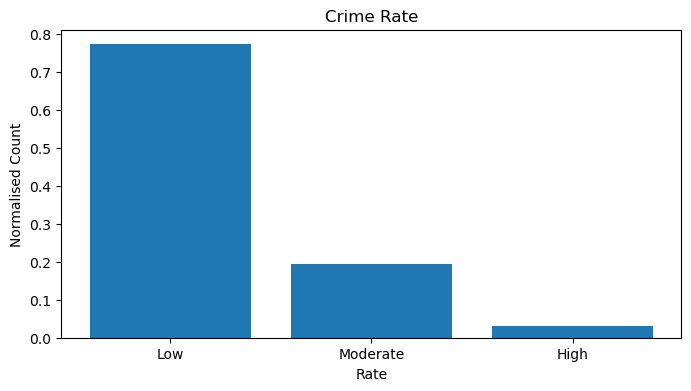

In [41]:
# Get the value counts
value_counts = df['Crime_Rate'].value_counts(normalize=True)

# List down categories
categories = ['Low', 'Moderate', 'High']

# Reindex the value according to the category
ordered_counts = value_counts.reindex(categories)

#values and the index for the x and y axis data
y = ordered_counts.values
x = ordered_counts.index

# Plotting the graph
plt.figure(figsize=(8,4))
plt.bar(x, y)
plt.title("Crime Rate")
plt.xlabel("Rate")
plt.ylabel("Normalised Count")
plt.show()

2. Most towns have `very low` proportions of residential areas.

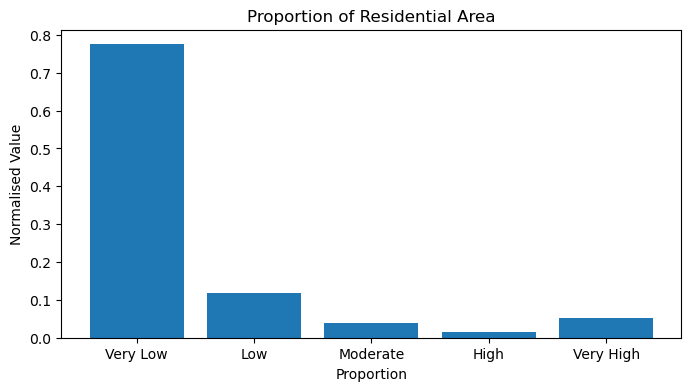

In [42]:
# Get the value counts
value_counts = df['Residential_Area'].value_counts(normalize=True)

categories = ['Very Low','Low', 'Moderate', 'High', 'Very High']

ordered_counts = value_counts.reindex(categories)

#values and the index for the x and y axis data
y = ordered_counts.values
x = ordered_counts.index

plt.figure(figsize=(8,4))
plt.bar(x, y)
plt.title("Proportion of Residential Area")
plt.xlabel("Proportion")
plt.ylabel("Normalised Value")
plt.show()

3. Most towns have houses situated `far` away from the river, and are thus far away from a bridge.

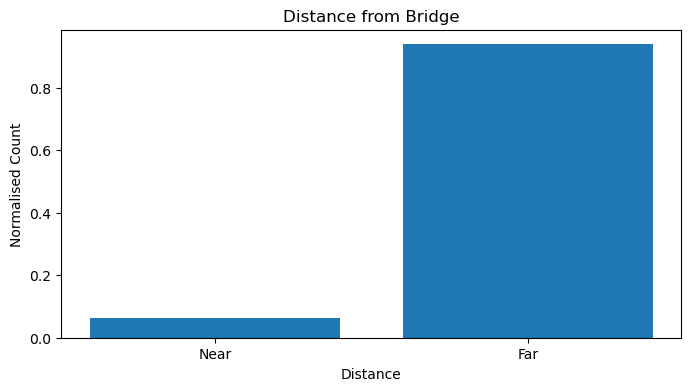

In [43]:
# Get the value counts
value_counts = df['River'].value_counts(normalize=True)

categories = ['Near', 'Far']

ordered_counts = value_counts.reindex(categories)

#values and the index for the x and y axis data
y = ordered_counts.values
x = ordered_counts.index

plt.figure(figsize=(8,4))
plt.bar(x, y)
plt.title("Distance from Bridge")
plt.xlabel("Distance")
plt.ylabel("Normalised Count")
plt.show()

4. Most towns have houses that have `moderate` accessibility to major highways.

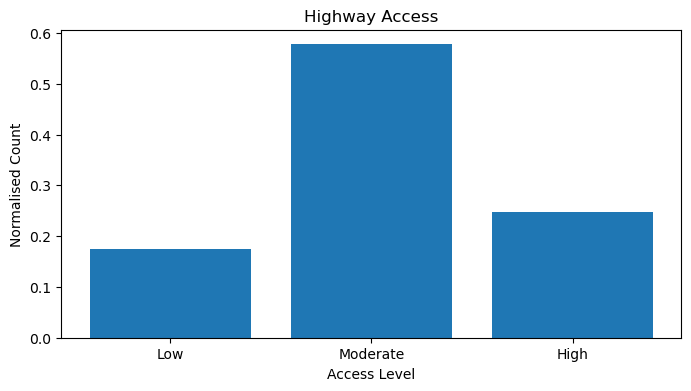

In [44]:
# Get the value counts
value_counts = df['Highway_Access'].value_counts(normalize=True)

categories = ['Low', 'Moderate', 'High']

ordered_counts = value_counts.reindex(categories)

#values and the index for the x and y axis data
y = ordered_counts.values
x = ordered_counts.index

plt.figure(figsize=(8,4))
plt.bar(x, y)
plt.title("Highway Access")
plt.xlabel("Access Level")
plt.ylabel("Normalised Count")
plt.show()

**B) Histograms for numerical variables**

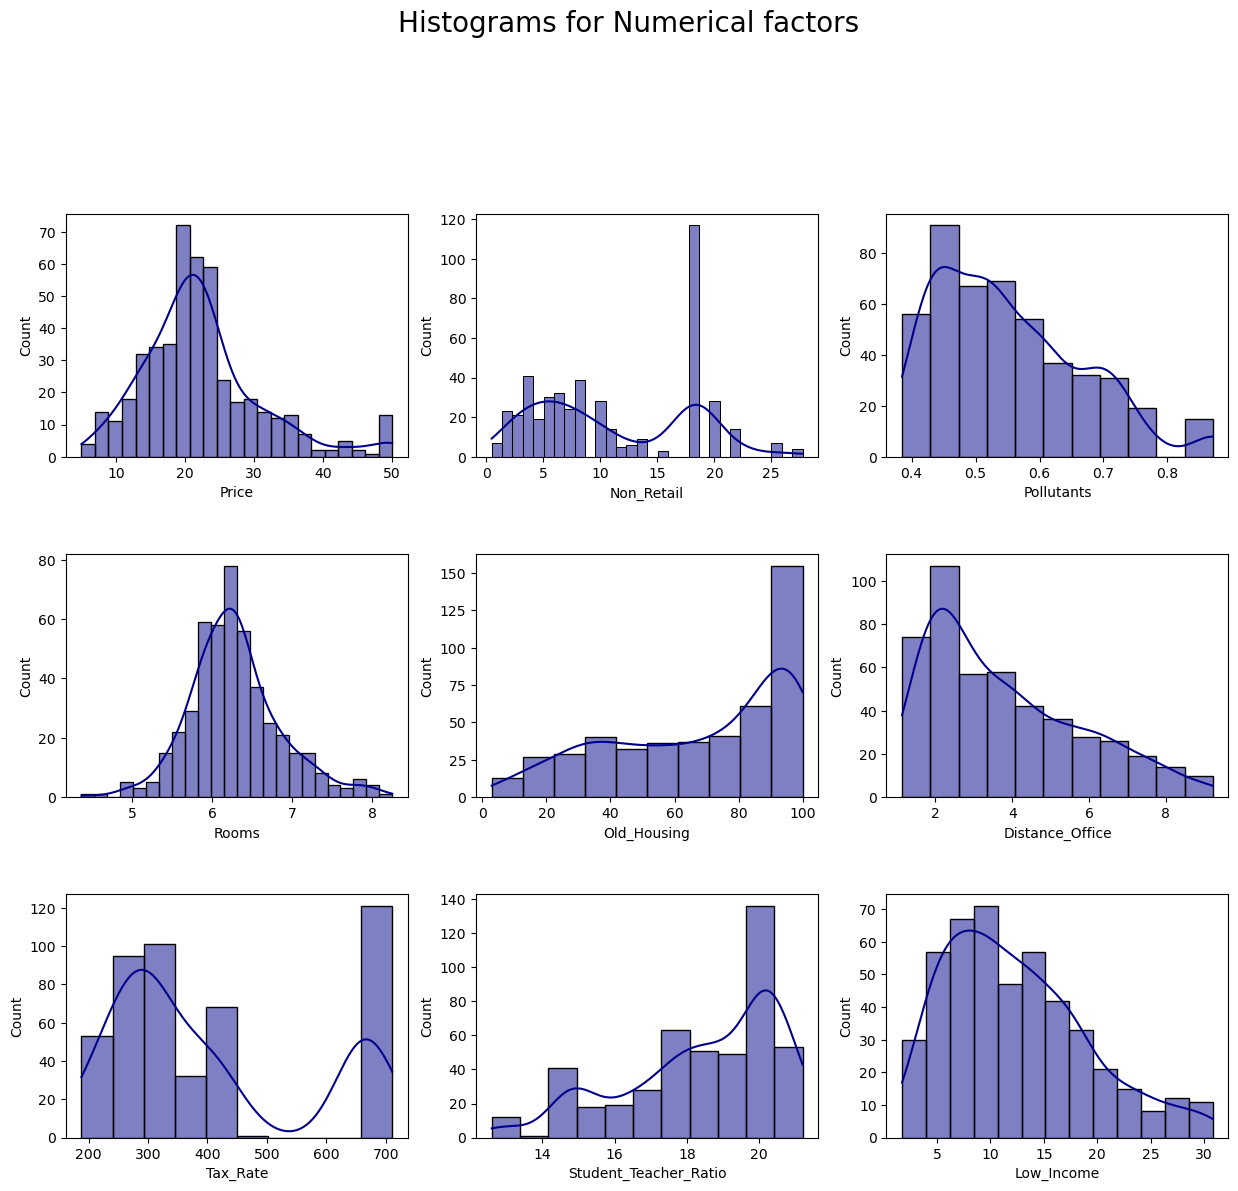

In [45]:
import seaborn as sns

fig, axes = plt.subplots(3,3, figsize =(15, 12), dpi = 100)
plt.subplots_adjust(hspace = 0.4)
fig.suptitle('Histograms for Numerical factors', y = 1.05, size = 20)

hist1 = sns.histplot(df['Price'], ax = axes[0,0], kde=True, color = 'darkblue')

#hist2 = sns.histplot(df['Non_Retail'], ax = axes[0,1], kde=True)
#bins = int(30), color = 'darkblue')

hist2 = sns.histplot(df['Non_Retail'], ax = axes[0,1], kde=True,
bins = int(30), color = 'darkblue')

hist3 = sns.histplot(df['Pollutants'], ax = axes[0,2], kde=True, color = 'darkblue')

hist4 = sns.histplot(df['Rooms'], ax = axes[1,0], kde=True, color = 'darkblue')

hist5 = sns.histplot(df['Old_Housing'], ax = axes[1,1], kde=True, color = 'darkblue')

hist6 = sns.histplot(df['Distance_Office'], ax = axes[1,2], kde=True, color = 'darkblue')

hist7 = sns.histplot(df['Tax_Rate'], ax = axes[2,0], kde=True, color = 'darkblue')

hist8 = sns.histplot(df['Student_Teacher_Ratio'], ax = axes[2,1], kde=True, color = 'darkblue')

hist9 = sns.histplot(df['Low_Income'], ax = axes[2,2], kde=True, color = 'darkblue')


**Key observations:**


<u>Distributions of numerical variables</u>
1. Price: right-skewed
2. Non_Retail: multimodal distribution, peaking at 5 and 18
3. Pollutants: right-skewed
4. Rooms: normal distribution
5. Old_Housing: left-skewed
6. Distance_Office: right-skewed
7. Tax_Rate: multimodal distribution, peaking at 300 and 660
8. Student_Teacher_Ratio: left-skewed
9. Low_Income: right-skewed


<u>Outliers</u><br>
There are a few isolated bars in several of the histograms that seem to indicate the presence of outliers. These points are:

1. <u>Pollutants > 0.8<br/></u>
While these points may seem like outliers at first glance, there are data points with the same parts per 10 million. Hence, we are inclined to believe that these are not 'outliers', but instead valid observations.

2. <u>Non_Retail > 25<br/></u>
Likewise, there are a few data points with the same percentage of business areas used for non-retail businesses in that area, indicating they're not necessarily 'outliers'.

3. <u>Tax Rate > 500<br/></u>
Although these number are very far fetched from the rest of the data, there are many data in this section that we cannot consider as 'outliers'.

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

To make it easier to identify relationships that are important to analyse, we decided to create a pair plot, which in our case we're using `heatmap`, for a visual representation of the correlation matrix. This would give an indication of the correlation between different pairs of variables and allow us to determine the pairs worth doing a bi-variate analysis. 

We will take pairs with correlation that are greater equal than 0.7 or less equal than -0.7 as they are generally considered to have strong relations.

We will start by making a new dataframe with only the numerical variables.

In [46]:
#drop categorical data
df_encoded = df_encoded.drop(columns = ["Residential_Area", "Crime_Rate", "River", "Highway_Access"])
df_encoded.head()

,Non_Retail,Pollutants,Rooms,Old_Housing,Distance_Office,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price,Crime_Rate_encoded,Residential_Area_encoded,Highway_Access_encoded
0,2.31,0.538,6.575,65.2,4.0900,296,15.3,4.98,24.0,1.0,4.0,1.0
1,7.07,0.469,6.421,78.9,4.9671,242,17.8,9.14,21.6,1.0,4.0,1.0
2,7.07,0.469,7.185,61.1,4.9671,242,17.8,4.03,34.7,1.0,4.0,1.0
3,2.18,0.458,6.998,45.8,6.0622,222,18.7,2.94,33.4,1.0,4.0,1.0
4,2.18,0.458,7.147,54.2,6.0622,222,18.7,5.33,36.2,1.0,4.0,1.0


Now we plot the heatmap.

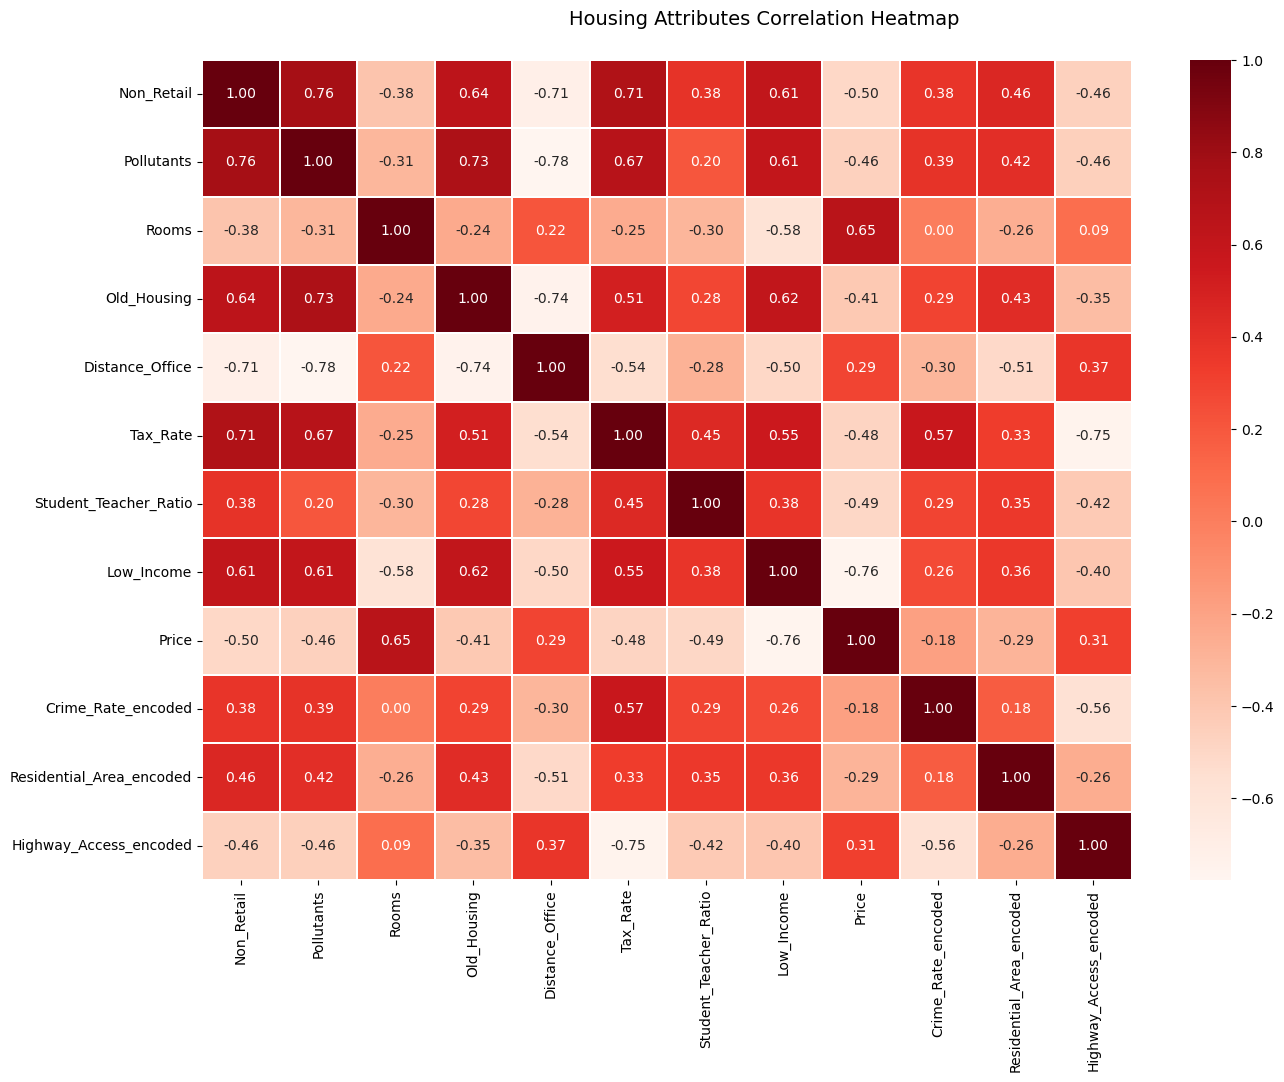

<Figure size 1280x960 with 0 Axes>

In [47]:
#Heatmap
f, ax = plt.subplots(figsize=(15, 10))
plt.figure(dpi = 200)
corrMatrix = df_encoded.corr()
sns.heatmap(corrMatrix, annot=True, ax=ax, cmap="Reds", fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Housing Attributes Correlation Heatmap', fontsize=14)

**Numeric.** 

We will now explain about relations between pairs that have correlation coefficient value of greater equal than 0.7 or less equal than -0.7. 

We will be using scatterplot to provide a clear visual relationship of two variables. Also, scatterplots can highlight outliers, variability, correlation of a pair of variables.

### **1. Price and Low_Income**

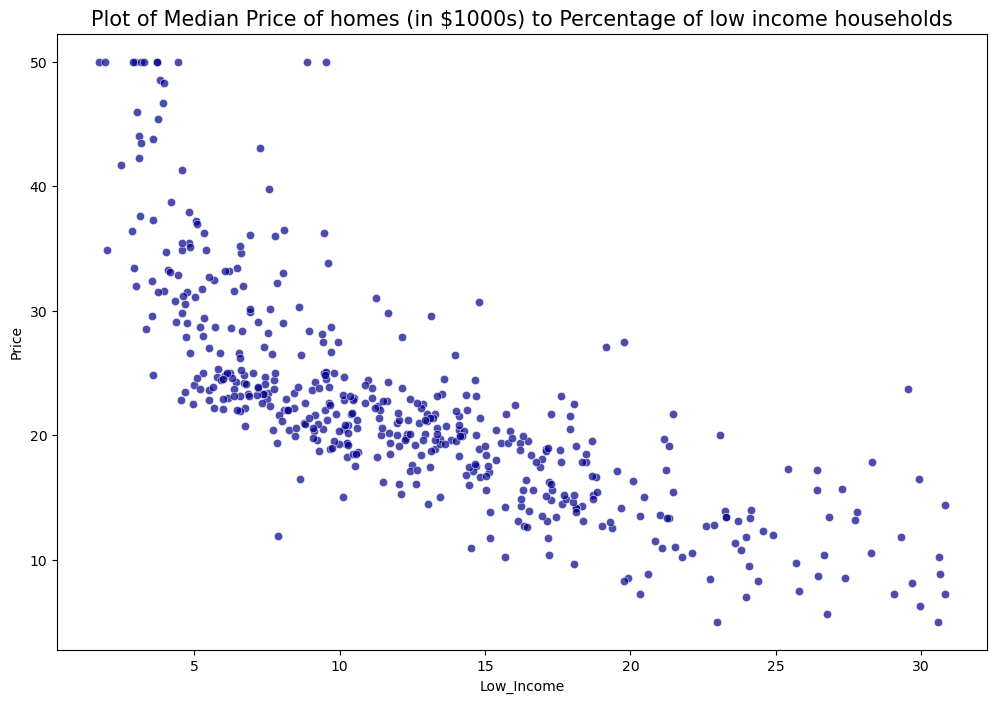

In [48]:
# scatter plot for Price against Low_Income
plt.figure(figsize=(12,8))

sns.scatterplot(x = 'Low_Income', y = 'Price', data = df, color = 'darkblue', alpha = 0.7)
plt.title("Plot of Median Price of homes (in $1000s) to Percentage of low income households", fontsize = 15)
plt.show()

From the scatter plot we can see that there's an inverse relationship between `Price` and `Low_Income`, suggesting that as the percentage of low income households increases, the median price of homes (in $1000s) decreases. 

This could be due to a myriad of factors. For instance, low-income households typically have less disposable income to spend on housing, leading them to opt for more affordable housing options in less expensive areas. Additionally, the reduced purchasing power of these households contributes to lower demand for housing in such areas.

Other factors, such as a lack of investement and development, including infrastructure, amenities, and community development, compared to more affluent towns also contribute to a more affordable housing prices. 

Moreover, towns with higher concentration of low-income households may be perceived as less desirable. This market perception can further drive down prices in these towns.



### **2. Pollutants and Old_Housing**

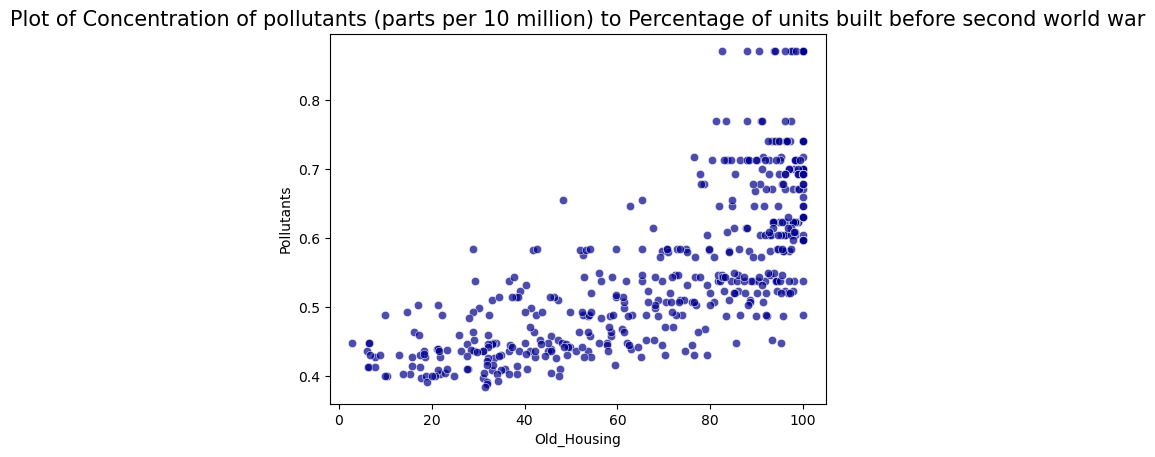

In [49]:
# scatter plot for Pollutants against Old_Housingplt.figure(figsize=(12,8))
sns.scatterplot(x = 'Old_Housing', y = 'Pollutants', data = df, color = 'darkblue', alpha = 0.7)
plt.title("Plot of Concentration of pollutants (parts per 10 million) to Percentage of units built before second world war", fontsize = 15)
plt.show()

From the scatterplot, we can see that there is a positive correlation between pollutants and percentage of old housing. This means as the percentage of pollutants rise, number of old housings also increases. There might be several reasons to this. 

Firstly, houses in the past uses construction materials like lead (as paint) and asbestos (for insulation and fireproofing). As time passes, these materials degrade and release harmful particles to the environment. 

Secondly, older houses lack modern energy-efficient design and materials, which means they must use more energy for cooling, heating, and other daily activities. This results in higher level of pollution. 

Furthermore, there seems to several potential outliers that can be identified visually. We can see a cluster of high percentage data points on the end of old housing, or some areas with low percentages of old housing but relatively high pollutant levels. 

Finally, the variance of the data gets higher as the number of old housing increases. At lower percentages of old housing, pollutant levels are more tightly clustered, while at higher percentages, they are more spread out.

### **3. Pollutants and Distance_Office**

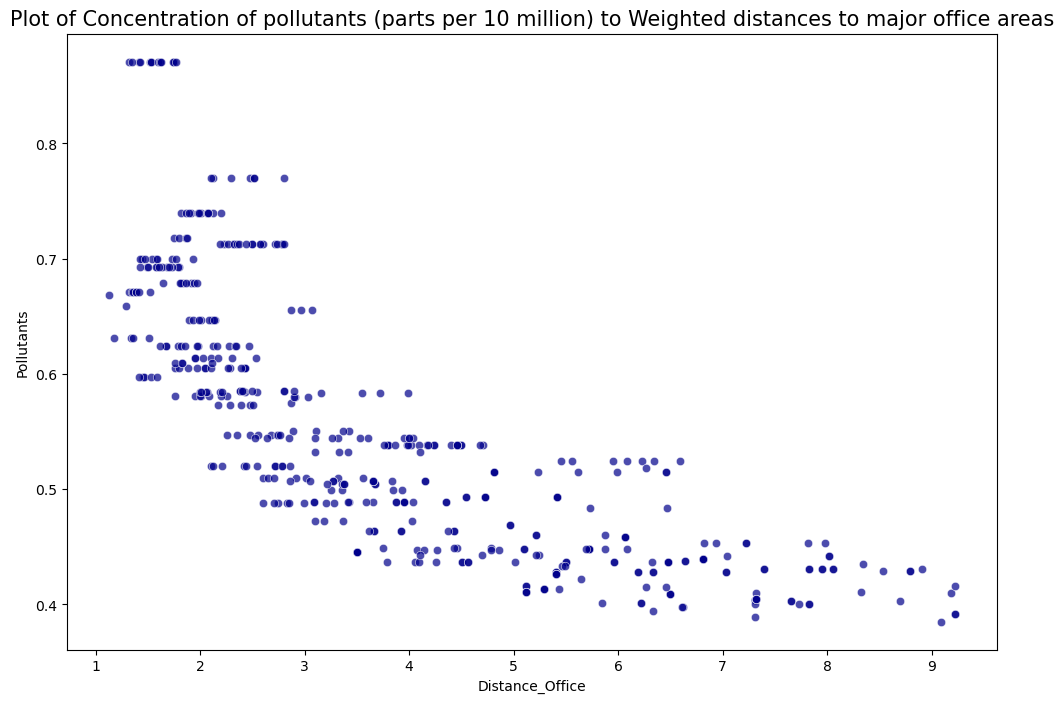

In [50]:
# scatter plot of Pollutants against Distance_Office
plt.figure(figsize=(12,8))

sns.scatterplot(x = 'Distance_Office', y = 'Pollutants', data = df, color = 'darkblue', alpha = 0.7)
plt.title("Plot of Concentration of pollutants (parts per 10 million) to Weighted distances to major office areas", fontsize = 15)
plt.show()

From the scatterplot, it is conspicuous that there is a general decrease in pollutant levels as the distance to office (weighted distances to major office areas) increases. This implies that there are less pollutants in areas that are farther away from office commercial or industrial areas. 

We can also see that on lower distances, there tend to be more data points. This may be because people tend to live closer to their office to reduce commuting time. Another possible reason is business areas provide a wider range of services compared to non-business areas. This results in higher human activity on business areas, which translates to higher concentration of pollutants.  

Finally, towards the farther end of the distance scale, there seems to be less variance in pollution, this could indicate that there are less factors affecting the concentration of pollutant in remote areas. 

### **4. Tax Rate and Non Retail**

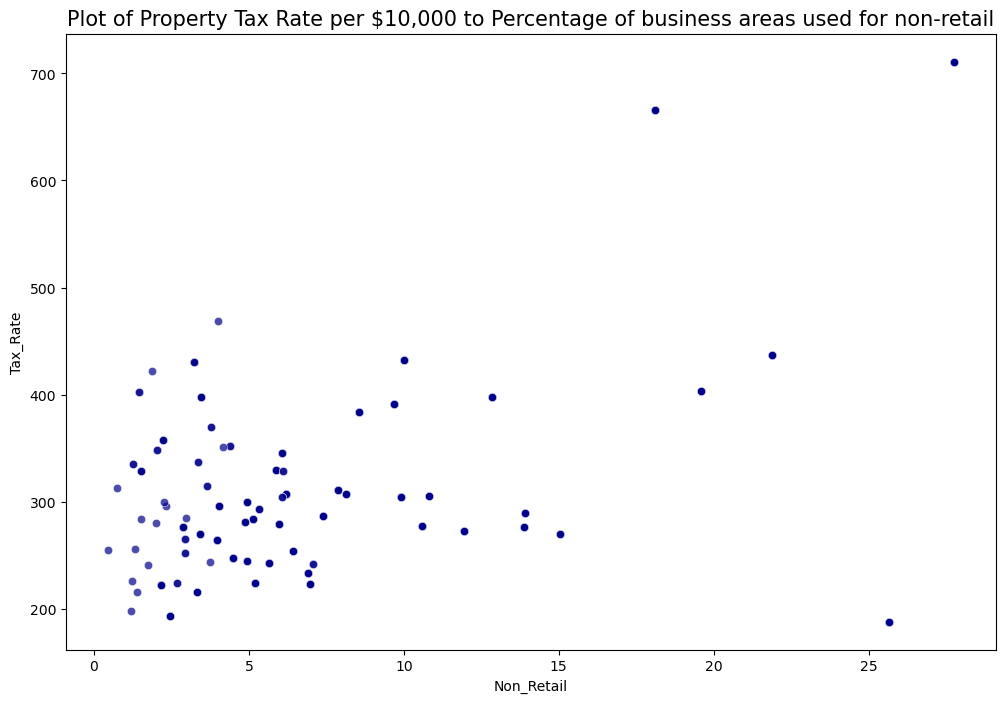

In [51]:
# scatter plot for Tax_Rate against Non_Retail
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Non_Retail', y = 'Tax_Rate', data = df, color = 'darkblue', alpha = 0.7)
plt.title("Plot of Property Tax Rate per $10,000 to Percentage of business areas used for non-retail", fontsize = 15)
plt.show()


From the scatter plot, we can deduce that there is a degree of positive correlation between the two variables. This suggests that as the percentage of business areas used for non-retail increases, property tax rates increase as well.
A possible reason for this could be that these areas may require more extensive infrastructure and services. As a result, this will lead to higher tax rates in order to cover the additional costs.

However, this positive correlation does not appear to be strong. As seen in the scatter plot, the data points are quite dispersed and do not form a tight linear pattern.
To add on, this plot alone cannot confirm such deduction of the trend. For a more comprehensive understanding, we can perform multiple regression to determine the influence of other factors, such as the overall size of the business area, or median income levels of the surrounding residential zones.

### **5. Non-Retail and Distance Office**

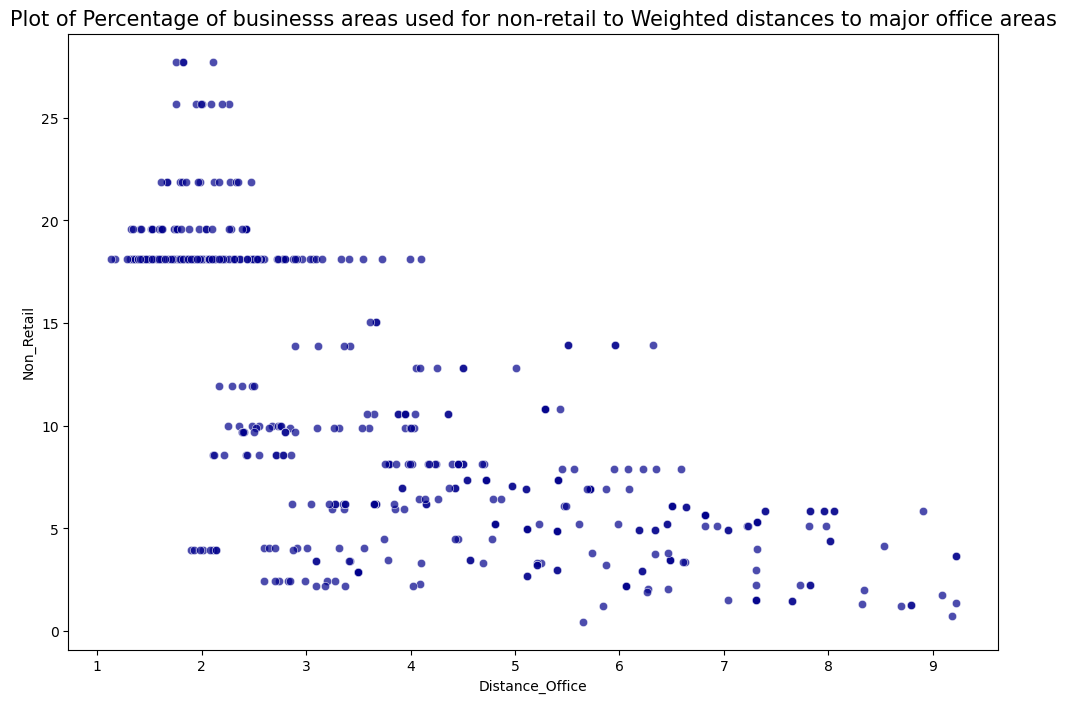

In [52]:
# scatter plot of Distance_Office against Non_Retail
plt.figure(figsize=(12,8))

sns.scatterplot(x = 'Distance_Office', y = 'Non_Retail', data = df, color = 'darkblue', alpha = 0.7)
plt.title("Plot of Percentage of businesss areas used for non-retail to Weighted distances to major office areas", fontsize = 15)
plt.show()

From the scatterplot, we can see that the relationship between the percentage of business area for non-retail and distance from major office areas is a negative relationship where as the distance from  major office areas increases, the percentage of business area for non-retail decreases at a decreasing rate. 

This is likely due to urban planning, where office areas are usually separated from residential and places of leisure. At such office areas, people are there mainly to work, and will spend a significant portion of their time at their offices, so it is not optimal to target such people for sales for most retail businesses such as department stores. The opposite is true for places where people go to enjoy or spend their money, and it is more effective to have retail stores there where there is the correct  target audience for their goods.

Another possibility is that these office areas make up non-retail area. As you get closer to the major office areas, more of the area is for non-retail as those are where the offices are located.

### **6. Pollutants and Non-Retail**

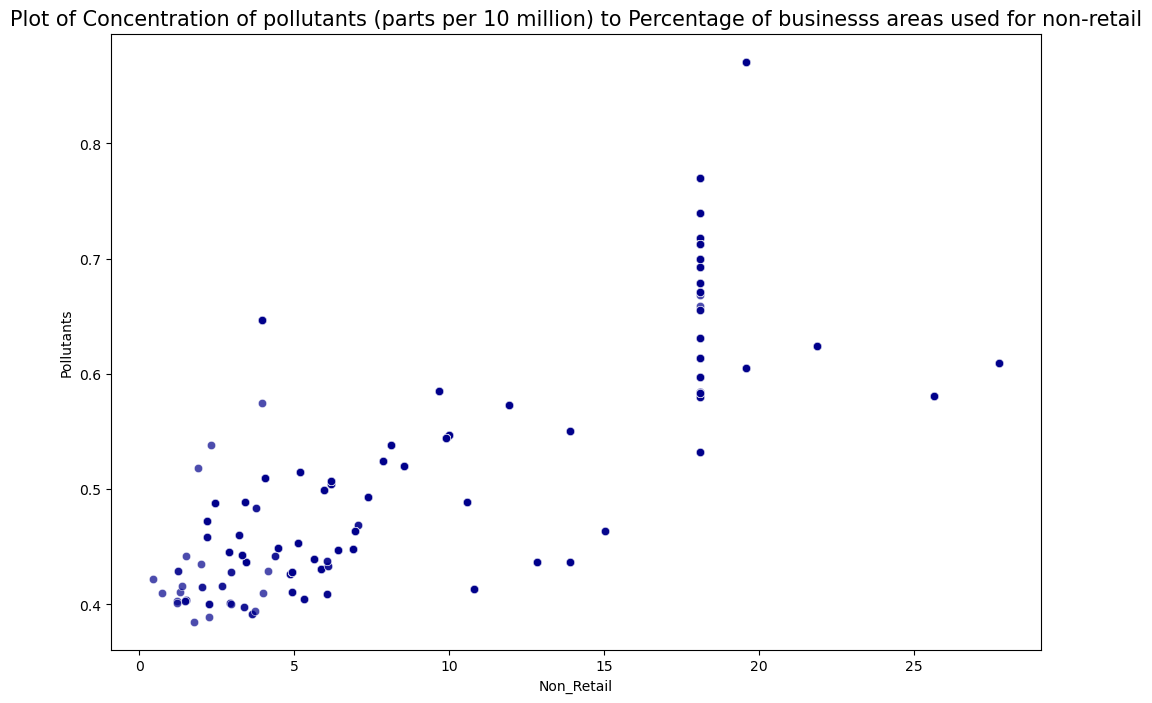

In [53]:
# scatter plot of Pollutants against Non_Retail
plt.figure(figsize=(12,8))

sns.scatterplot(x = 'Non_Retail', y = 'Pollutants', data = df, color = 'darkblue', alpha = 0.7)
plt.title("Plot of Concentration of pollutants (parts per 10 million) to Percentage of businesss areas used for non-retail", fontsize = 15)
plt.show()

From the scatterplot we can see that the general trend for the relationship between Non-Retail and Pollutants is positive. As the percentage of business area for Non-Retail increases, the concentration of pollutants increases. 

Contextually, one possible reason is that Non-Retail facilities tend to be more focused on production of goods and services, and will inadvertently produce more waste. For example, manufacturing plants producing electronic goods would emit pollutants such as volatile organic compounds (VOCs) and heavy metals during the assembly process, and data centers, which operate non-stop to support online services, consume a significant amount of electricity, leading to emissions from power plants supplying its energy needs.

Another noticeable pattern is that there is an unusual amount of data points at around 17% of business area used for Non-Retail. At this percentage, there are many different levels of concentration of pollutants, ranging from 0.54 to 0.77 parts per 10 million. This could be due to zoning regulations or urban planning guidelines that encourage a 17% non-retail area, or market dynamics which cause 17% to be an optimum level.

### **7. Old_Housing and Distance Office**

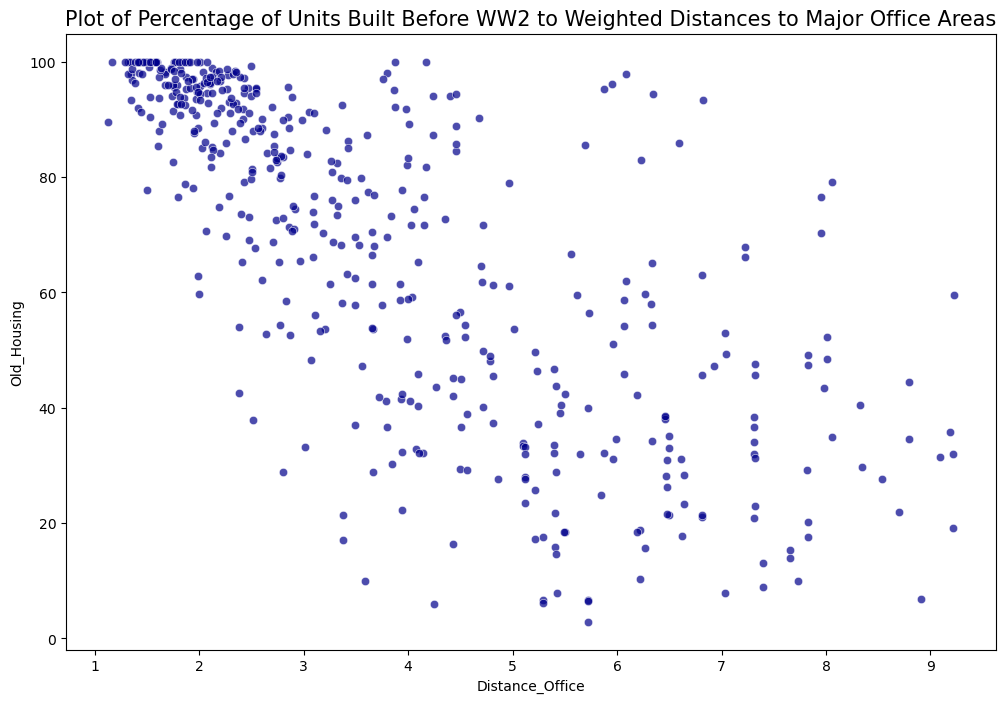

In [54]:
# scatter plot for Old_Housing against Distance_Office
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Distance_Office', y = 'Old_Housing', data = df, color = 'darkblue', alpha = 0.7)
plt.title("Plot of Percentage of Units Built Before WW2 to Weighted Distances to Major Office Areas", fontsize = 15)
plt.show()

The scatterplot shows that there is a trend of decreasing old housing as the distance from the office increases, with a higher concentration of older housing located closer to the major office areas.
This suggests that housing units built before World War II are predominantly located in or around city centres, which are typically closer to major office areas.

A possible reason could be for cultural value whereby housing from the pre-WWII might have a significant cultural and social value that communities would be passionate about to keep its existence. Hence, this results in efforts to preserve these housings near the urban centres that are closer to major office buildings.

## Part II: Modeling [12% of final grade]

### 1. Problem formulation [15% of Part II]

**a.** Formulate one regression problem and one classification based on the dataset, in **no more than 50 words**.

Based on our processed Housing Dataset,

**For regression :**<br>
Construct a regression model that can help us predict the median housing price in a town (in $1000s).

**For classification :**<br>
Predict the price category (such as "Low", "Moderate", "High") of the houses based on the features.

**b.** State which problem (regression or classification) you would be investigating and why, in **no more than 20 words**.

Regression problem. Predicting the prices within a continuous range gives us a more precise estimate, rather than broad categories.

**c.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 20 words**

Our dependent variable is `Price`. It is important to understand what external variables affects house prices.

### 2. Model training [30% of Part II]

**a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis.

Let's first take a look at the data types of each column in our data. We will observe the number of categorical and numerical features respectively.

In [55]:
datatypes = df.dtypes
print(datatypes)

Crime_Rate                object
Residential_Area          object
Non_Retail               float64
River                     object
Pollutants               float64
Rooms                    float64
Old_Housing              float64
Distance_Office          float64
Highway_Access            object
Tax_Rate                   int64
Student_Teacher_Ratio    float64
Low_Income               float64
Price                    float64
dtype: object


In [56]:
# separating the columns of data into 2 lists based on their data type: 
# one for categorical features and 
# another for numerical features.

datatypes = df.dtypes
categorical_features = datatypes[datatypes=="object"].index
numerical_features = datatypes[datatypes!="object"].index

In [57]:
print(f"# categorical features: {len(categorical_features)}")
print(f"# numerical features: {len(numerical_features)}")

# categorical features: 4
# numerical features: 9


## Feature selection :

We decided to utilise various methods for feature selection in order to capture the complexity of our data set and reducing bias from a specific method. 

#### Numerical Features: 
(a) Pearson's correlation coefficient method <br/>

#### Categorical Features: 
(b) Chi square test 

#### Both Numerical and Categorical Features: 
(c) Sequential feature selection <br/>
(d) Random forest <br/>

To keep track of which features are selected after the analysis from each method, we have decided to store it in a dictionary. After each feature selection method, we will award a point to the feature that is selected by the method. At the end, we will select the features that has cummulative points that is more than a certain arbitrary threshold.

Before we dive in to each methods, first, we create `Result_mapping`, which is a dictionary to store the accumulated points from our methods.

In [58]:
# create an empty dictionary 
result_mapping = {}

# initialize all the values for each key to zero
for feature in df_encoded.columns:
    result_mapping[feature] = 0

result_mapping

{'Non_Retail': 0,
 'Pollutants': 0,
 'Rooms': 0,
 'Old_Housing': 0,
 'Distance_Office': 0,
 'Tax_Rate': 0,
 'Student_Teacher_Ratio': 0,
 'Low_Income': 0,
 'Price': 0,
 'Crime_Rate_encoded': 0,
 'Residential_Area_encoded': 0,
 'Highway_Access_encoded': 0}

Next, we will define a function that updates a dictionary with result from each test. This function will be called during every feature selection test.

Note that if the original categorical features are selected, the points will be allocated to their encoded variable name instead. 

In [59]:
def input_result(mapping, result):
    for feature in result:
        if feature == 'River':
            feature = 'River_enc'
        elif feature == 'Highway_Access':
            feature = 'Highway_Access_encoded'
        elif feature == 'Crime_Rate':
            feature = 'Crime_Rate_encoded'
        elif feature == 'Residential_Area':
            feature = 'Residential_Area_encoded'
        
        mapping[feature] += 1

### A) Pearson's correlation coefficient method (for numerical values)


Pearson's correlation coefficient is a statistical technique used to measure the degree of linear relationship between two continuous variables and hence only used for numerical features only. 

Pearson's correlation coefficient is calculated by dividing the covariance of the two variables by the product of their standard deviations. The value ranges between -1 and 1, where 1, 0, and -1 indicate a perfect match, no correlation, and perfect negative correlation, respectively. 

We decided to use this method because we thought that there might be a linear relationship between features and the target variable, `Price`. It's easy to use and implement as well.

Below is our implementation of our Pearson's correlation coefficient method.

In [60]:
def correlation_coefficient(df, target, threshold):
    
    #chosen features
    significant_features = []
    
    for feature in df.columns:
        if feature == target: continue
            
        if abs(df[feature].corr(df[target])) >= threshold:
            significant_features.append(feature)

    return significant_features

The following is a heatmap to visualize the method on our data. 

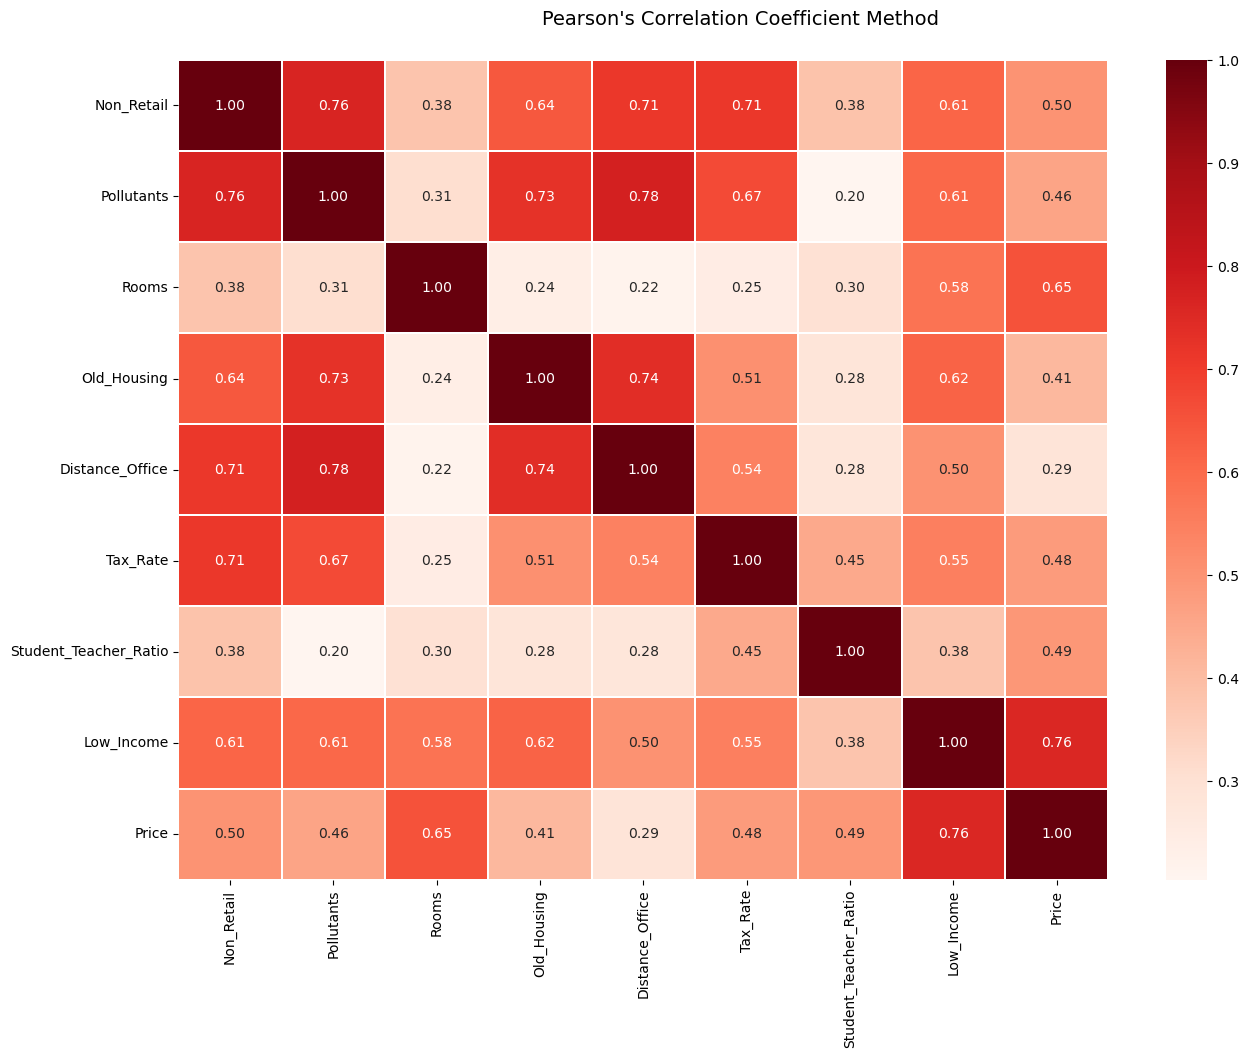

<Figure size 1280x960 with 0 Axes>

In [61]:
#Heatmap
f, ax = plt.subplots(figsize=(15, 10))
plt.figure(dpi = 200)
corrMatrix = abs(df[numerical_features].corr())
sns.heatmap(corrMatrix, annot=True, ax=ax, cmap="Reds", fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Pearson\'s Correlation Coefficient Method', fontsize=14)

Here we evoke our above method on our data. We will choose the features that has correlation coefficient with `Price` that is greater equal than 0.5.

In [62]:
result = correlation_coefficient(df[numerical_features], 'Price', 0.5)
print("Features selected from Pearson's correlation coefficient method", result, "\n")

input_result(result_mapping, result)
print("These are the accumulated points for each feature : ")
result_mapping

Features selected from Pearson's correlation coefficient method ['Non_Retail', 'Rooms', 'Low_Income'] 

These are the accumulated points for each feature : 


{'Non_Retail': 1,
 'Pollutants': 0,
 'Rooms': 1,
 'Old_Housing': 0,
 'Distance_Office': 0,
 'Tax_Rate': 0,
 'Student_Teacher_Ratio': 0,
 'Low_Income': 1,
 'Price': 0,
 'Crime_Rate_encoded': 0,
 'Residential_Area_encoded': 0,
 'Highway_Access_encoded': 0}

### B) Chi square test 

A chi-squared test (chi-square or $x^2$ test) is a statistical test used to determine whether there is a significant association between two categorical variables. After calculating the chi-squared test statistic, it'll be compared to a critical value from the chi-squared distribution (or in our case, we use a p-value) to determine whether the differences are statistically significant. 

We chose chi-squared test because we wanted to use the raw categorical data (without encoding them). Furthermore, since it doesn't make assumption that the features are in normal distribution, this fits with our situation where most of our categorical data are skewed. It is relatively easy to understand as well where if the chi-squared value exceeds the critical value (p-value), it will reject the null hypothesis and conclude that there is a significant association between the variables.


Below is our implementation of our Chi square test.

In [63]:
from scipy.stats import chi2_contingency

def chi_square_test(df, target, threshold):
    
    significant_features = []
    
    for feature in categorical_features:
        if feature == target: continue
            
        contingency_table = pd.crosstab(df[feature], df[target])

        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Feature: {feature}, P-value: {p}")
        
        if p < threshold:
            significant_features.append(feature)

    return significant_features

Here we evoke our above method on our data. We will choose the features that has p-value more than 0.05.

In [64]:
result = chi_square_test(df, 'Price', 0.05)
print("\n\nFeatures selected from Chi square test method", result, "\n")

input_result(result_mapping, result)
print("These are the accumulated points for each feature : ")
result_mapping

Feature: Crime_Rate, P-value: 7.963300548324209e-11
Feature: Residential_Area, P-value: 1.6672044915361178e-06
Feature: River, P-value: 0.09208332922130041
Feature: Highway_Access, P-value: 0.0004054474831391008


Features selected from Chi square test method ['Crime_Rate', 'Residential_Area', 'Highway_Access'] 

These are the accumulated points for each feature : 


{'Non_Retail': 1,
 'Pollutants': 0,
 'Rooms': 1,
 'Old_Housing': 0,
 'Distance_Office': 0,
 'Tax_Rate': 0,
 'Student_Teacher_Ratio': 0,
 'Low_Income': 1,
 'Price': 0,
 'Crime_Rate_encoded': 1,
 'Residential_Area_encoded': 1,
 'Highway_Access_encoded': 1}

### C) Sequential feature selection

Sequential Feature Selection is a technique used in machine learning to select a subset of relevant features for model construction. This helps to prevent an overfitted model whereby it is too complex, capturing patterns that do not generalize to other data sets.

We will start of with one feature, then adding more features incrementally to assess which feature subsets produce the best model performance based on cross-validation scores. The function returns the best performing subset (`best_features`) based on the cross-validation score  (`best_score`).

We chose Sequential Feature Selection because it allows us to capture the complex nature of our data that may not be easily captured by pearson's correlation (linear assumption) or chi-squared test (association) as it considers the interaction between features.

In [65]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

def sequential_feature_selection(df, target):
    y = df[target]
    X = df.drop(target, axis=1)

    model = LinearRegression()
    
    # Containers for the best score and corresponding number of features and feature names
    best_score = -np.inf
    best_features = []
    feature_sets = {}

    # Define the maximum number of features to try
    max_features = X.shape[1]

    for n_features_to_select in range(1, max_features):
        sfs = SequentialFeatureSelector(model, n_features_to_select=n_features_to_select, direction='forward')
        sfs.fit(X, y)
        
        # Get the mask of selected features and the corresponding names
        selected_mask = sfs.get_support()
        selected_features = X.columns[selected_mask].tolist()
        
        # Store the selected feature set with its performance score
        scores = cross_val_score(model, X[selected_features], y, cv=5)  # 5-fold cross-validation
        mean_score = np.mean(scores)
        feature_sets[n_features_to_select] = {'score': mean_score, 'features': selected_features}

        if mean_score > best_score:
            best_score = mean_score
            best_features = selected_features
    
    return best_features, feature_sets

Here we evoke our above method on our data. We will choose the best_features that has achieved the highest performance score, hence representing the best performing subset of all features.

In [66]:
#input result for sequential feature selection
best_features, feature_sets = sequential_feature_selection(df_encoded, 'Price')
best_six_features = feature_sets[len(best_features)]['features'] # Identify the best set 
print("Features selected from Sequential feature selection method", best_six_features, "\n")

input_result(result_mapping, best_six_features)
print("These are the accumulated points for each feature : ") 
result_mapping

Features selected from Sequential feature selection method ['Pollutants', 'Rooms', 'Distance_Office', 'Tax_Rate', 'Student_Teacher_Ratio', 'Low_Income', 'Residential_Area_encoded'] 

These are the accumulated points for each feature : 


{'Non_Retail': 1,
 'Pollutants': 1,
 'Rooms': 2,
 'Old_Housing': 0,
 'Distance_Office': 1,
 'Tax_Rate': 1,
 'Student_Teacher_Ratio': 1,
 'Low_Income': 2,
 'Price': 0,
 'Crime_Rate_encoded': 1,
 'Residential_Area_encoded': 2,
 'Highway_Access_encoded': 1}

### D) Random forest

Random Forest is a supervised model which combines multiple models for calculation of mean values for regression. It uses a process called "bootstrap", where the training dataset is resampled and each sample contains multiple subsets of the original data. Each sample is used to fit a decision tree, and the results of the decision trees are averaged out. 

Each decision tree can assess a feature's significance based on its ability to increase the purity of the leaves. The higher the purity, the more important that feature is. This is done for all trees, and then averaged out.

We can use Random Forest for feature selection by:
1. Training a Random Forest model on our dataset.
2. Extracting the feature importance scores from the trained model.
3. Selecting the top features with the highest importance scores.

We chose Random Forest since it allows us to capture the complex nature of our data and it is relatively easy to use and implement.

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def random_forest(df, target):
    # Prepare data
    X = df.drop([target], axis=1)
    y = df[target]
    
    # Initialize and fit the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # Get feature importances
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    
    # Sort features by importance
    feature_importances = feature_importances.sort_values(ascending=False)
    
    return feature_importances

Here we evoke our above method on our data. We will choose the top 2 features with the highest importance scores because their importance scores are quite high compared to the other features.

In [68]:
#input_result for random forest

result = random_forest(df_encoded, 'Price')
print("Features selected from Random Forest method\n", result, "\n")

input_result(result_mapping, result.index[:2])
print("These are the accumulated points for each feature : ")
result_mapping

Features selected from Random Forest method
 Low_Income                  0.637882
Rooms                       0.185606
Distance_Office             0.067655
Pollutants                  0.031960
Student_Teacher_Ratio       0.024846
Tax_Rate                    0.019574
Old_Housing                 0.018131
Non_Retail                  0.008288
Crime_Rate_encoded          0.002386
Highway_Access_encoded      0.002077
Residential_Area_encoded    0.001596
dtype: float64 

These are the accumulated points for each feature : 


{'Non_Retail': 1,
 'Pollutants': 1,
 'Rooms': 3,
 'Old_Housing': 0,
 'Distance_Office': 1,
 'Tax_Rate': 1,
 'Student_Teacher_Ratio': 1,
 'Low_Income': 3,
 'Price': 0,
 'Crime_Rate_encoded': 1,
 'Residential_Area_encoded': 2,
 'Highway_Access_encoded': 1}

## Finalisation of All Observations

Here are the tabulated points from our feature selection methods. We will select features that have a score of 3, which is the maximum feature selected. Although we have 4 methods, some methods has special condition, such as Chi Square Test is only for categorical features, and Pearson's Correlation Coefficient method is only for numerical features. 

In [69]:
print("These are the accumulated points for each feature : ")
for key, value in result_mapping.items():
    print(f"{key}: {value}")

selected_features = [feature for feature, num in result_mapping.items() if num > 2]
print("\nFeatures selected:", selected_features, "\n\n")

These are the accumulated points for each feature : 
Non_Retail: 1
Pollutants: 1
Rooms: 3
Old_Housing: 0
Distance_Office: 1
Tax_Rate: 1
Student_Teacher_Ratio: 1
Low_Income: 3
Price: 0
Crime_Rate_encoded: 1
Residential_Area_encoded: 2
Highway_Access_encoded: 1

Features selected: ['Rooms', 'Low_Income'] 






We can verify the quality of our feature selection by testing their <b>independence</b>. An ideal feature selection  would include features that are poorly corelated with each other, as having dependent features could introduce hidden biases. We define a good feature selection as features as having a corelation coefficient of less than 0.5 with all other features.

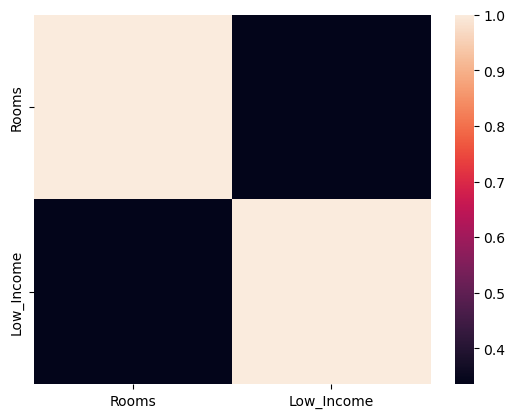

In [70]:
r2 = df_encoded[selected_features].corr()**2
sns.heatmap(r2)
plt.show()

In [71]:
# get the feature that has the most number of features
# it is correlated with, beyond certain threshold

def most_corr_feature(df2, threshold):
    r2_matrix = abs(df2.corr())
    count = r2_matrix[r2_matrix>threshold].count()
    return count.sort_values(ascending=False).index[0]

# return true if all the features are uncorrelated,
# as defined by a threshold

def all_features_uncorr(df2, threshold):
    r2_matrix = abs(df2.corr())
    n = len(r2_matrix)
    return r2_matrix[r2_matrix>threshold].count().sum()==n

# get a set of uncorrelated features
def get_uncorr_features(df2, threshold):
    features = df2.columns.tolist()
    while all_features_uncorr(df2[features], threshold) == False:
        most_corr_fea = most_corr_feature(df2[features], threshold)
        features.remove(most_corr_fea)
    return features

In [72]:
selected_features = get_uncorr_features(df_encoded[selected_features], 0.5)
print(f"updated selected features : {selected_features}")

updated selected features : ['Low_Income']


**b.** Split the dataset into train and test sets. Describe how you split step by step.

We split the dataset into train/test set and then fit our model with the train dataset and evaluate the model using the test set.

**Step 1:** We import `train_test_split` from the model selection package in sklearn. This will allow us to split our dataset randomly into 75/25, i.e., we keep 25% of the dataset for model evaluation purpose.


In [73]:
from sklearn.model_selection import train_test_split

**Step 2:** We assigned the column `Price` (target variable) to the variable called Y, and assigned all the features selected (independent variables) to the variable called X.

In [74]:
X = df_encoded[selected_features]
y = df_encoded[["Price"]]

**Step 3:** Perform the splitting of data. We set `random_state` to 42 in order to make the randomisation reproducible.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 1)
(118, 1)
(353, 1)
(118, 1)


**c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to
train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity.

We decided to train the following models:
#### 1. Linear Regression (Ordinary Least-Squares)

Linear Regression is a machine learning algorithm based on supervised learning that fits a linear model by the linear approximation. We chose this model because we assume a linear relationship between the independent variable in the dataset, and the dependent variable.

#### 2. Ridge Regression (L2 regularization)

Ridge regression is a statistical regularization technique that reduce errors caused by overfitting on training data and does not require any unbiased estimates. Hence, we chose this model to allow a good representation of the population of our dataset.

#### 3. Neural Network
Neural network is a computational model inspired by human brain that is divided into layers of neurons. 1 layer for input, 1 layer for output and the rest for computation (hidden layer). This method can capture complex nature of our dataset that linear and ridge regression might have overlooked.


**d.** For each model, perform the training, and report the trained parameters and the training scores, if applicable. 

We have recognised that training the model on the entire train set from our train-test split causes the model to depend on only one split of the data. However, training on different splits of the data could yield different results, and averaging the results will provide a more reliable estimate of the model's performance and reduces its reliance on any single split of the data.
Hence, we decided to employ `k-fold cross-validation` on our training set.

Performing only 1 run of cross-validation could still result in a noisy estimate of the model's performance, hence we decided to repeat the cross-validation procedure, and report the mean result obtained across all folds, from all runs. 

We also leave our test set from the train-test split as an unseen hold out data set to predict the results with our trained models. 
This would allow us to judge a model's performance on data in generalising to unseen data. The performance would then be determined by our various performance metrics (RMSE, MAE and Coefficient of Determination).

#### Model 1: Linear Regression

Execute grid search and cross validation for Linear regression

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# prepare test model, set kfold cross validation and hyperparameter.
linear_model_test = LinearRegression()
rkf = RepeatedKFold(n_splits= 5, n_repeats=2, random_state= 42)
param_grid = {'fit_intercept': [True, False]}

# Create grid search
grid_search = GridSearchCV(linear_model_test, param_grid = param_grid, cv = rkf)

# Search for best hyperparameter and perform cross validation
grid_search.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=42),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

Print result of grid search (best hyperparameters and cross validation result)

In [78]:
# Result of grid search
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters: {'fit_intercept': True}


Set up model 1 with the hyperparameters, and evaluating the model.

In [79]:
# fit model1 based on the best parameter found in the previous grid search ('fit_intercept': True)
model1 = LinearRegression(**grid_search.best_params_).fit(X_train, y_train)

# get the scores
model1_r2 = model1.score(X_test, y_test)
coef1 = model1.coef_
bias1 = model1.intercept_

print("Model 1: Linear Regression ")
print("--------------------------")
print(f"Features : {X.columns.tolist()}")
print(f"Coefficients: {coef1[0]}") 
print(f"Intercept : {bias1[0]}")
print(f"Coeff of Determination : {model1_r2}")

Model 1: Linear Regression 
--------------------------
Features : ['Low_Income']
Coefficients: [-1.00848718]
Intercept : 35.08258667087423
Coeff of Determination : 0.6513939565912752


#### Model 2: Ridge Model

Execute grid search and cross validation for ridge regression

In [80]:
from sklearn.linear_model import Ridge

# Prepare model, cross validation, hyperparameters and scoring for grid search
ridge_model_test = Ridge()
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
param_grid = {'alpha': np.linspace(0,1,num=10),
           'fit_intercept': [True, False],
           'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
           'tol': [1e-5, 1e-4, 1e-3, 1e-2],
           'random_state': [42]}

# Create grid search
grid_search = GridSearchCV(estimator=ridge_model_test, param_grid=param_grid,
                  verbose=1, scoring='r2', cv=rkf)

# Search for best hyperparameters and perform cross validation
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=42),
             estimator=Ridge(),
             param_grid={'alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'fit_intercept': [True, False], 'random_state': [42],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga'],
                         'tol': [1e-05, 0.0001, 0.001, 0.01]},
             scoring='r2', verbose=1)

Print result of grid search (best hyperparameters and cross validation result)

In [81]:
# Result of grid search
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters: {'alpha': 0.0, 'fit_intercept': True, 'random_state': 42, 'solver': 'sag', 'tol': 0.01}


Set up model 2 with the hyperparameters, and evaluating the model.

In [82]:
# Fit model2 based on Ridge_Model.best_params_
model2 = Ridge(**grid_search.best_params_).fit(X_train, y_train)

# Get the scores
model2_r2 = model2.score(X_test, y_test)
coef2 = model2.coef_
bias2 = model2.intercept_

print("Model 2: Ridge Regression ")
print("--------------------------")
print(f"Features : {X.columns.tolist()}")
print(f"Coefficients: {coef2[0]}") 
print(f"Intercept : {bias2[0]}")
print(f"Coeff of Determination : {model2_r2}")

Model 2: Ridge Regression 
--------------------------
Features : ['Low_Income']
Coefficients: [-0.65372448]
Intercept : 30.748300946653185
Coeff of Determination : 0.5772129312611276


#### Model 3: Neural Network

Execute grid search and cross validation for neural network

In [83]:
from sklearn.neural_network import MLPRegressor

# Prepare the model, cross validation, and hyperparameters for grid search
mlp_test = MLPRegressor(max_iter=1000, random_state=42)
rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=42)
param_grid = {
    'hidden_layer_sizes': [(200,), (300,), (400,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.05, 0.04],
    'alpha': [0.0000001, 0.000001, 0.00001, 0.0001]
}

# Create grid search
grid_search = GridSearchCV(mlp_test, param_grid, n_jobs=-1, cv=rkf, scoring='r2')

# Perform grid search
grid_search.fit(X_train, y_train.values.flatten())

GridSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=42),
             estimator=MLPRegressor(max_iter=1000, random_state=42), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [1e-07, 1e-06, 1e-05, 0.0001],
                         'hidden_layer_sizes': [(200,), (300,), (400,)],
                         'learning_rate_init': [0.05, 0.04],
                         'solver': ['sgd', 'adam']},
             scoring='r2')

Print result of grid search (best hyperparameters and cross validation result)

In [84]:
# Result of grid search
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters: {'activation': 'relu', 'alpha': 1e-07, 'hidden_layer_sizes': (300,), 'learning_rate_init': 0.04, 'solver': 'adam'}


Set up model 3 with the hyperparameters, and evaluating the model. 

Note : We can't find the coefficients and intercept for neural network because of the non-linear relationships between input and output, unlike Linear Regression and Ridge Regression.

In [85]:
model3 = MLPRegressor(**grid_search.best_params_, random_state=42).fit(X_train, y_train.values.flatten())

# get the scores

model3_r2 = model3.score(X_test, y_test)

# Print results
print("Model 3: Neural Network ")
print("--------------------------")
print(f"Features : {X.columns.tolist()}")
print(f"Coeff of Determination : {model3_r2}")

Model 3: Neural Network 
--------------------------
Features : ['Low_Income']
Coeff of Determination : 0.6779965979389189


### 3. Model evaluation and selection [30% of Part II]

**a.** For each model, predict the response variable on the test set.

In [86]:
# model 1 -- linear regression

test_predictions1 = model1.predict(X_test)
test_predictions1

array([[29.26361563],
       [28.24504358],
       [14.56995739],
       [21.86131971],
       [17.99881381],
       [28.66860819],
       [25.31034588],
       [17.83745586],
       [13.66231892],
       [25.11873331],
       [25.90535331],
       [10.77804558],
       [12.78493507],
       [20.30824945],
       [21.61928279],
       [17.49457021],
       [33.14629128],
       [28.37614691],
       [18.7148397 ],
       [22.63785484],
       [30.0603205 ],
       [25.33051562],
       [21.69996176],
       [27.22647152],
       [24.72542331],
       [25.53221306],
       [23.32362613],
       [23.0109951 ],
       [21.93191382],
       [30.59481871],
       [22.940401  ],
       [24.84644177],
       [21.52851894],
       [ 8.4081007 ],
       [23.29337151],
       [33.08578205],
       [ 8.21648814],
       [20.63096535],
       [23.48498408],
       [ 5.54399711],
       [19.10814971],
       [28.12402511],
       [27.62986639],
       [29.99981127],
       [24.46321664],
       [20

In [87]:
# model 2 -- ridge

test_predictions2 = model2.predict(X_test)
test_predictions2

array([[26.97631072],
       [26.316049  ],
       [17.4515451 ],
       [22.17797307],
       [19.67420832],
       [26.59061328],
       [24.41371077],
       [19.56961241],
       [16.86319307],
       [24.28950312],
       [24.79940821],
       [14.99354107],
       [16.29445278],
       [21.17123737],
       [22.02107919],
       [19.34734608],
       [29.49314995],
       [26.40103318],
       [20.1383527 ],
       [22.68134091],
       [27.49275306],
       [24.42678526],
       [22.07337715],
       [25.65578728],
       [24.03455058],
       [24.55753016],
       [23.12587356],
       [22.92321897],
       [22.22373378],
       [27.83922703],
       [22.87745825],
       [24.11299751],
       [21.96224399],
       [13.45728855],
       [23.10626182],
       [29.45392648],
       [13.3330809 ],
       [21.3804292 ],
       [23.23046947],
       [11.60071104],
       [20.39330525],
       [26.23760206],
       [25.91727707],
       [27.45352959],
       [23.86458221],
       [21

In [88]:
# model 3 -- neural network

test_predictions3 = model3.predict(X_test)
test_predictions3

array([27.86390515, 26.77583139, 15.56151909, 21.05399942, 17.95424219,
       27.20348999, 24.07468262, 17.84164346, 14.92815121, 23.90686689,
       24.59579464, 13.73947879, 14.34551716, 19.69380873, 20.84202165,
       17.60237115, 48.26809452, 26.90630546, 18.45389908, 21.73409476,
       31.84428655, 24.09234744, 20.9126809 , 25.76214823, 23.56240301,
       24.26899558, 22.33469844, 22.06089382, 21.11582627, 34.68486643,
       21.99906697, 23.6683919 , 20.76252998, 13.30760849, 22.30820122,
       47.94451083, 13.27269131, 19.97644576, 22.47601695, 12.78568863,
       18.73906468, 26.65539379, 26.16360691, 31.52271147, 23.33276043,
       19.94111613, 27.62086716, 26.0130599 , 25.4260409 , 17.77830667,
       18.30611324, 40.68760126, 41.86670988, 13.79644891, 27.20348999,
       17.94016735, 30.1828153 , 17.80645636, 25.52319737, 18.7782631 ,
       21.46912255, 16.97604069, 20.17959112, 24.28666039, 24.13650947,
       23.48291135, 22.58200583, 13.76336948, 38.38297985, 12.54

**b.** Describe the metric you use to 
evaluate your model(s). Report the test scores for each model.

Moving on, we will evaluate our models using the metric *Mean Absolute Error* (MAE), *Root Mean Squared Error*(RMSE) and *Coefficient of Determination* ($R^2$).

For regression problems, we would look at the following common evaluation metrics:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Coefficient of Determination ($R^2$)** is defined as the ratio of the variance explained by the model to the total variance.

   $$
   R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
   $$

We choose Coefficient of Determination ($R^2$) because : 
1. Easy to interpret because it ranges from 0 to 1, where 0 means no explanatory power and 1 means perfect explanatory power.

2. It is scale independent, unlike MAE and RMSE, which means it doesn't depend on the scale of the dependent variable. 

### Model 1 : Linear Regression

In [89]:
## model 1 evaluation

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# predict based on test set
y_pred = model1.predict(X_test)

# compare with ground truth
mae = mean_absolute_error(y_test, y_pred)
ave = np.mean(y_test["Price"])
rmse = mean_squared_error(y_test, y_pred, squared = False)  # setting squared = False returns the square-root 
r2 = r2_score(y_test, y_pred)

print("Model 1 Evaluation")
print("-----------------")
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")
print(f"Coefficient of Determination (R^2): {r2:.4f}")

Model 1 Evaluation
-----------------
MAE: 3.77
MAE as % of mean: 17.9%
RMSE: 4.83
Coefficient of Determination (R^2): 0.6514


### Model 2 : Ridge Regression

In [90]:
## model 2 evaluation

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# predict based on test set
y_pred = model2.predict(X_test)

# compare with ground truth
mae = mean_absolute_error(y_test, y_pred)
ave = np.mean(y_test["Price"])
rmse = mean_squared_error(y_test, y_pred, squared = False)  # setting squared = False returns the square-root 
r2 = r2_score(y_test, y_pred)

print("Model 2 Evaluation")
print("-----------------")
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")
print(f"Coefficient of Determination (R^2): {r2:.4f}")

Model 2 Evaluation
-----------------
MAE: 4.05
MAE as % of mean: 19.2%
RMSE: 5.31
Coefficient of Determination (R^2): 0.5772


### Model 3 : Neural Network

In [91]:
# model 3 evaluation

y_pred = model3.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model 3 Evaluation")
print("-----------------")
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")
print(f"Coefficient of Determination (R^2): {r2:.4f}")

Model 3 Evaluation
-----------------
MAE: 4.05
MAE as % of mean: 19.2%
RMSE: 4.64
Coefficient of Determination (R^2): 0.6780


**c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**.

We chose Neural Network model as the final model because it has the largest coefficient of determination ($r^2$) value and has the least RMSE compared to the other three models.

### 4. Findings and conclusion [20% of Part II]

**a.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**.

We can see that `Low_Income` is the biggest and only significant predictor for housing price. <br>
Although it is not intuitive to have a single predictor, it could make sense if it's significantly correlated and there could be bias in the training dataset. 

**b.** Share any lesson you have learned from the project, in **no more than 50 words**.

We learnt the different ways of handling missing data: imputing, dropping rows and columns. During feature selection, intuitively, we thought we should select features with high predictive power, but we learnt that we should not take all of them as they might be correlated with other features and cause biases. 

### 5. Non-technical protocol [5% of Part II]

**a.** Describe the detailed contribution of each team member, including both the tangible (e.g., implementation, testing, writing) and intangible (e.g., generating ideas, planning, leadership) efforts.

<u>Durga:</u> <br/>
cleaned up the document phrasing and flow<br/>
<u>Gilchris:</u> <br/>
came up with the code implementation<br/>
<u>Denise:</u> <br/>
provided meaningful insights from the  data analysis <br/>
<u>Reiwen:</u> <br/>
made the base structure of the report and coordinated meetings<br/>
<u>Matthew:</u> <br/>
review of code and logic, analysis of results and insights<br/>




**b.** List any references and sources you have cited.

<b>Linear Regression</b><br/>
https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html<br/><br/>

<b>Ridge Regression </b><br/>
https://www.ibm.com/topics/ridgeregression#:~:text=Ridge%20regression%20is%20a%20statistical,regularization%20for%20linear%20regression%20models.<br/><br/>

<b>Pearson's correlation coefficient method</b><br/>
https://www.sciencedirect.com/topics/computer-science/pearson-correlation<br/><br/>

<b>Chi Squared Test</b><br/>
https://www.jmp.com/en_sg/statistics-knowledge-portal/chi-square-test.html<br/><br/>

<b>Random Forest</b><br/>
https://www.yourdatateacher.com/2021/10/11/feature-selection-with-random-forest/#:~:text=Random%20Forest%20is%20a%20very,a%20Recursive%20Feature%20Elimination%20procedure.

<b>Sequential Feature Selection</b><br/>
https://www.yourdatateacher.com/2023/02/15/a-practical-introduction-to-sequential-feature-selection/

<b>Neural Network</b><br/>
https://scikit-learn.org/stable/modules/neural_networks_supervised.html